# Formula 1 World Championship

## OverView

Formula 1, the pinnacle of motorsport, is renowned for its rich history, technological innovation, and global fanbase. The sport's complex dynamics, encompassing drivers, teams, circuits, and regulations, offer a wealth of data for analysis. This project aims to leverage historical Formula 1 data to explore various aspects of the sport, providing insights into race outcomes, driver performances, team strategies, and more.

In [ ]:
!mkdir /root/.kaggle

import os
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime


!pip install kaggle

api_token = {"username":"ronco7","key":"13ebcb7bfbf56ee2c34c6959e12abab8"}
#api_token = {"username":"gilrahamim","key":"b2f220ced3fb6d14f93c5951a7306b52"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download rohanrao/formula-1-world-championship-1950-2020 -p ./datasets/formula1/
!unzip ./datasets/formula1/*.zip -d ./datasets/formula1
!ls ./datasets/formula1

Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
License(s): CC0-1.0
 81% 5.00M/6.14M [00:00<00:00, 44.4MB/s]
100% 6.14M/6.14M [00:00<00:00, 52.4MB/s]
Archive:  ./datasets/formula1/formula-1-world-championship-1950-2020.zip
  inflating: ./datasets/formula1/circuits.csv  
  inflating: ./datasets/formula1/constructor_results.csv  
  inflating: ./datasets/formula1/constructor_standings.csv  
  inflating: ./datasets/formula1/constructors.csv  
  inflating: ./datasets/formula1/driver_standings.csv  
  inflating: ./datasets/formula1/drivers.csv  
  inflating: ./datasets/formula1/lap_times.csv  
  inflating: ./datasets/formula1/pit_stops.csv  
  inflating: ./datasets/formula1/qualifying.csv  
  inflating: ./datasets/formula1/races.csv  
  inflating: ./datasets/formula1/results.csv  
  inflating: ./datasets/formula1/seasons.csv  
  inflating: ./datasets/formula1/sprint_results.csv  
  inflating: ./datasets/formula1/status.csv  
circuits.csv		   drive

In [ ]:
# Load datasets
races = pd.read_csv('./datasets/formula1/races.csv').drop(columns=['url'])
drivers = pd.read_csv('./datasets/formula1/drivers.csv').drop(columns=['url'])
results = pd.read_csv('./datasets/formula1/results.csv')
constructors = pd.read_csv('./datasets/formula1/constructors.csv').drop(columns=['url'])
circuits = pd.read_csv('./datasets/formula1/circuits.csv').drop(columns=['url'])
lap_times = pd.read_csv('./datasets/formula1/lap_times.csv')
qualifying = pd.read_csv('./datasets/formula1/qualifying.csv')
constructor_standings = pd.read_csv('./datasets/formula1/constructor_standings.csv')
driver_standings = pd.read_csv('./datasets/formula1/driver_standings.csv')
pit_stops = pd.read_csv('./datasets/formula1/pit_stops.csv')
seasons = pd.read_csv('./datasets/formula1/seasons.csv').drop(columns=['url'])
status = pd.read_csv('./datasets/formula1/status.csv')
sprint_results = pd.read_csv('./datasets/formula1/sprint_results.csv')

In [ ]:
def convert_milliseconds(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    milliseconds = ms % 1000
    return f"{minutes}:{seconds:02d}.{milliseconds:03d}"

def calculate_age(birth_date, current_date):
    if isinstance(birth_date, pd.Timestamp):
        birth_date = birth_date.strftime('%Y-%m-%d')
    birth_date = datetime.strptime(birth_date, '%Y-%m-%d')
    return current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))

## Races

**Top 10 Formula 1 Drivers with Most Wins**


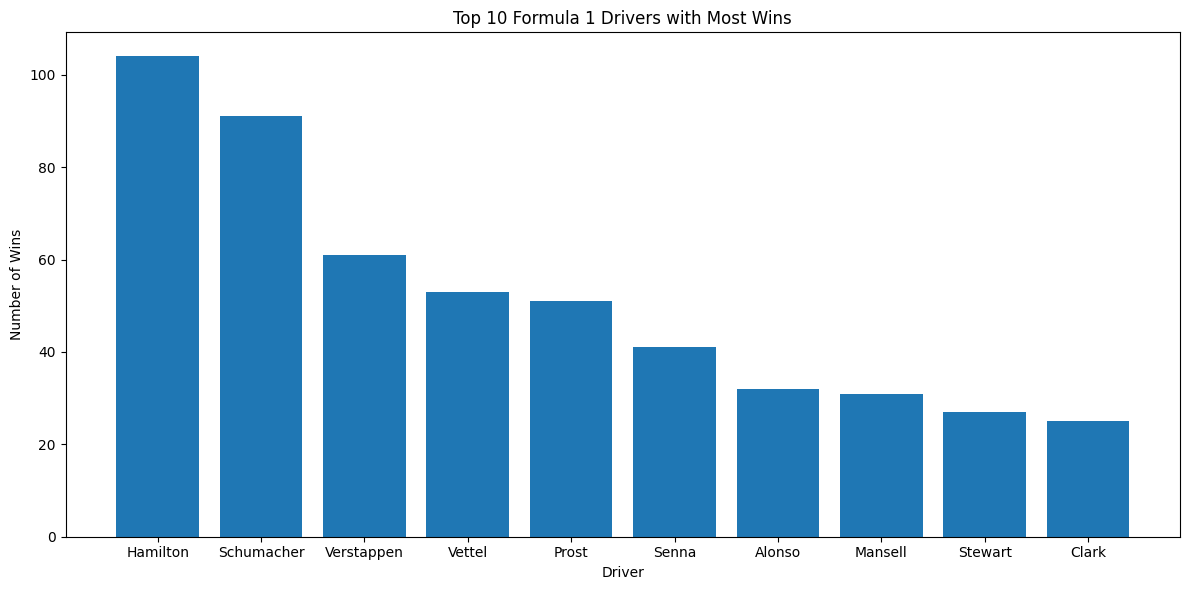

In [ ]:
race_results = results.merge(drivers, on='driverId', how='left')

wins_by_driver = race_results[race_results['position'] == '1'].groupby(['driverId', 'forename', 'surname']).size().reset_index(name='wins')

wins_by_driver_sorted = wins_by_driver.sort_values('wins', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(wins_by_driver_sorted['surname'].head(10), wins_by_driver_sorted['wins'].head(10))
plt.title('Top 10 Formula 1 Drivers with Most Wins')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.xticks()
plt.tight_layout()
plt.show()

**The drivers of the season 2024 won the race for the first time in their career**



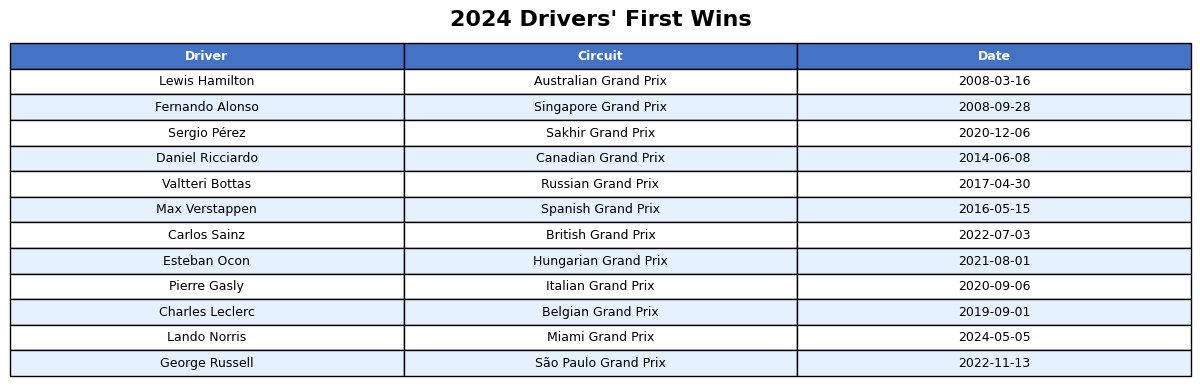

In [ ]:
merged_df = results.merge(races, on='raceId').merge(drivers, on='driverId')
races_2024 = merged_df[merged_df['year'] == 2024]
drivers_2024 = races_2024['driverId'].unique()
results_2024_drivers = merged_df[merged_df['driverId'].isin(drivers_2024)]

# Get the first win for each driver
first_wins = results_2024_drivers[results_2024_drivers['positionOrder'] == 1].groupby('driverId').first().reset_index()

first_wins_drivers = first_wins.merge(drivers, on='driverId')
first_wins_drivers['full_name'] = first_wins_drivers['forename_y'] + ' ' + first_wins_drivers['surname_y']
first_wins_drivers['circuit_name'] = first_wins_drivers['name']
first_wins_drivers = first_wins_drivers[['full_name', 'circuit_name', 'date', ]]

def create_drivers_first_wins_table(data):
    fig, ax = plt.subplots(figsize=(12, len(data) * 0.33))
    ax.axis('off')

    columns = ['Driver', 'Circuit', 'Date']
    cell_text = data.values.tolist()

    table = ax.table(cellText=cell_text,
                     colLabels=columns,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#4472C4')
            cell.set_text_props(color='white')
        else:
            cell.set_facecolor('#E6F1FF' if row % 2 == 0 else 'white')

    plt.title('2024 Drivers\' First Wins', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()

    return fig

fig = create_drivers_first_wins_table(first_wins_drivers)

plt.show()

**The drivers who took for the first time in their career Pole Position**

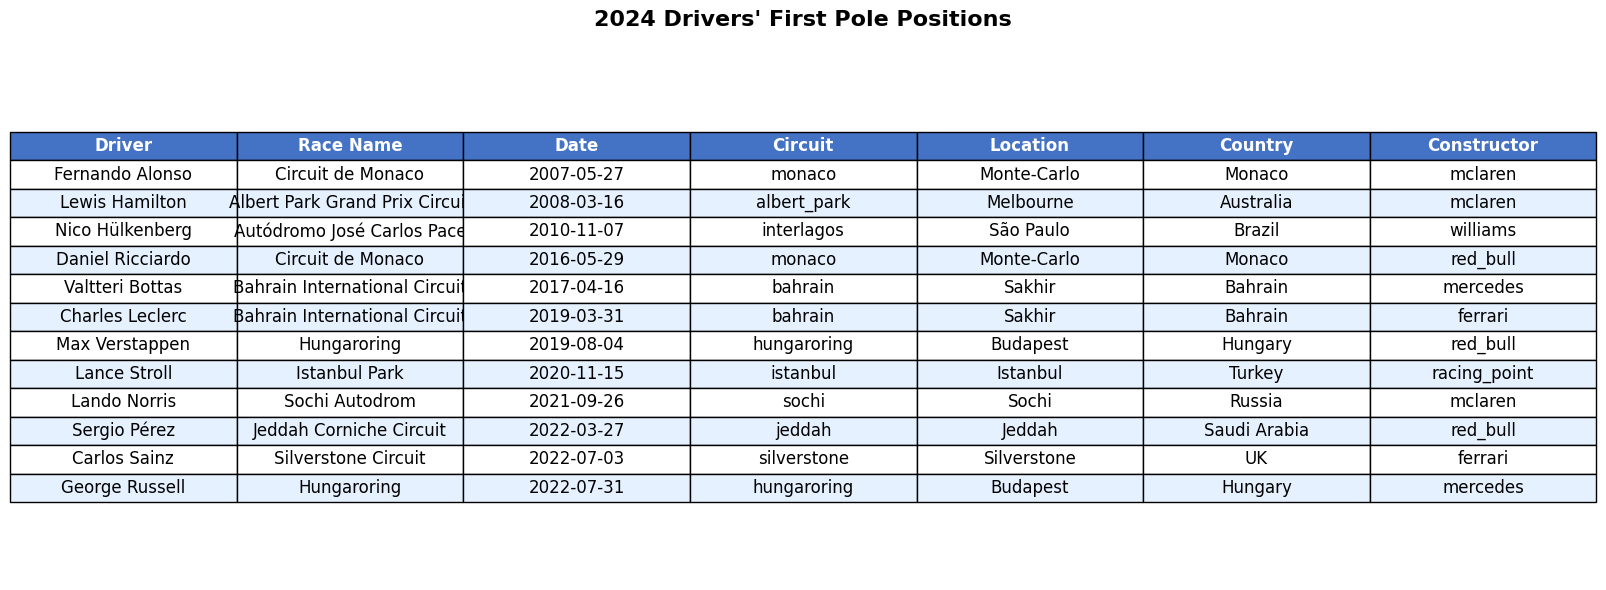

In [ ]:
merged_df = results.merge(races, on='raceId').merge(drivers, on='driverId').merge(constructors, on='constructorId').merge(circuits, on='circuitId')

races_2024 = merged_df[merged_df['year'] == 2024]

drivers_2024 = races_2024['driverId'].unique()
results_2024_drivers = merged_df[merged_df['driverId'].isin(drivers_2024)]

first_poles = results_2024_drivers[results_2024_drivers['grid'] == 1].groupby('driverId').first().reset_index()

first_poles_drivers = first_poles.merge(drivers, on='driverId', suffixes=('_left', '_right'))

first_poles_drivers['full_name'] = first_poles_drivers['forename_right'] + ' ' + first_poles_drivers['surname_right']

first_poles_drivers = first_poles_drivers[['full_name','name', 'date', 'circuitRef', 'location', 'country', 'constructorRef']]
first_poles_drivers.columns = ['full_name','Race Name', 'Date', 'place', 'Location', 'Country', 'Constructor']
first_poles_drivers['Date'] = pd.to_datetime(first_poles_drivers['Date']).dt.strftime('%Y-%m-%d')
first_poles_drivers = first_poles_drivers.sort_values(by='Date')

first_poles_drivers['Date'] = pd.to_datetime(first_poles_drivers['Date'])
first_poles_drivers = first_poles_drivers.sort_values(by='Date')

def create_drivers_first_poles_table(data):
    fig, ax = plt.subplots(figsize=(16, len(data) * 0.5))
    ax.axis('off')

    columns = ['Driver', 'Race Name', 'Date', 'Circuit', 'Location', 'Country', 'Constructor']
    cell_text = data[['full_name', 'Race Name', 'Date', 'place', 'Location', 'Country', 'Constructor']].values.tolist()

    table = ax.table(cellText=cell_text,
                     colLabels=columns,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#4472C4')
            cell.set_text_props(color='white')
        else:
            cell.set_facecolor('#E6F1FF' if row % 2 == 0 else 'white')

    plt.title('2024 Drivers\' First Pole Positions', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()

    return fig

first_poles_drivers['Date'] = pd.to_datetime(first_poles_drivers['Date']).dt.strftime('%Y-%m-%d')

first_poles_drivers_sorted = first_poles_drivers.sort_values(by='Date')

fig = create_drivers_first_poles_table(first_poles_drivers_sorted)

plt.show()

## Drivers

**Who are the top 5 drivers with the most podium finishes?**

<ipython-input-8-09cbf9a05ae7>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


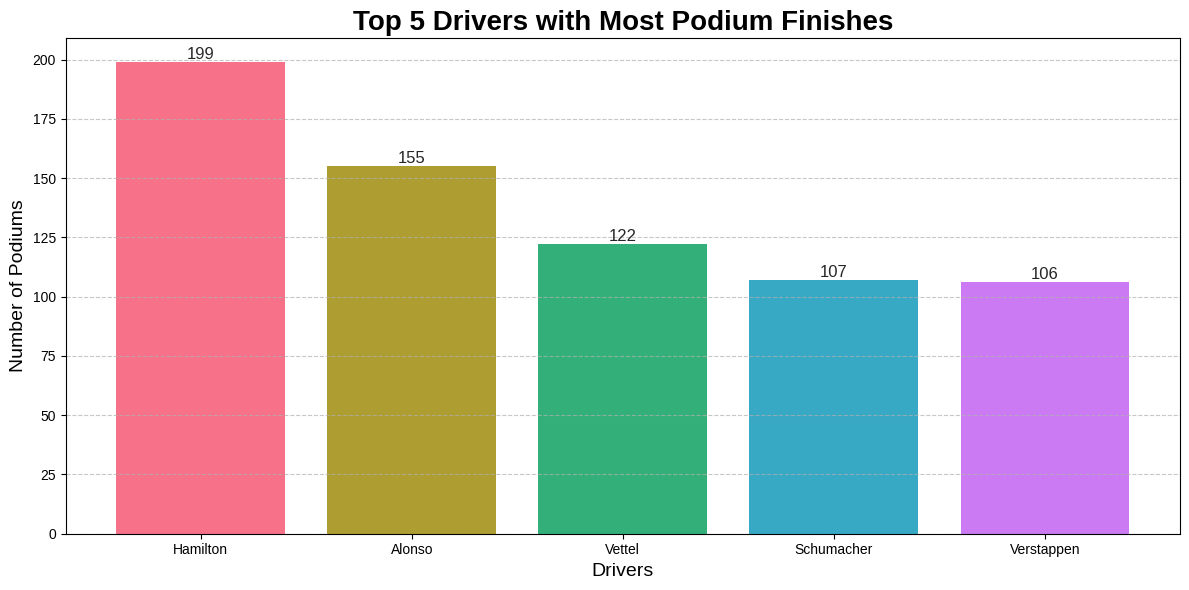

In [ ]:
podiums = results[results['positionOrder'] <= 3]['driverId'].value_counts().head(5)
top_5_drivers = drivers[drivers['driverId'].isin(podiums.index)][['driverId','surname']]
top_5_drivers

fig, ax = plt.subplots(figsize=(12, 6))
plt.style.use('seaborn')
bars = ax.bar(top_5_drivers['surname'], podiums.values, color=sns.color_palette("husl", 5))

ax.set_title('Top 5 Drivers with Most Podium Finishes', fontsize=20, fontweight='bold')
ax.set_xlabel('Drivers', fontsize=14)
ax.set_ylabel('Number of Podiums', fontsize=14)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom', fontsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Average Finishing Position for Top 20 F1 Drivers**

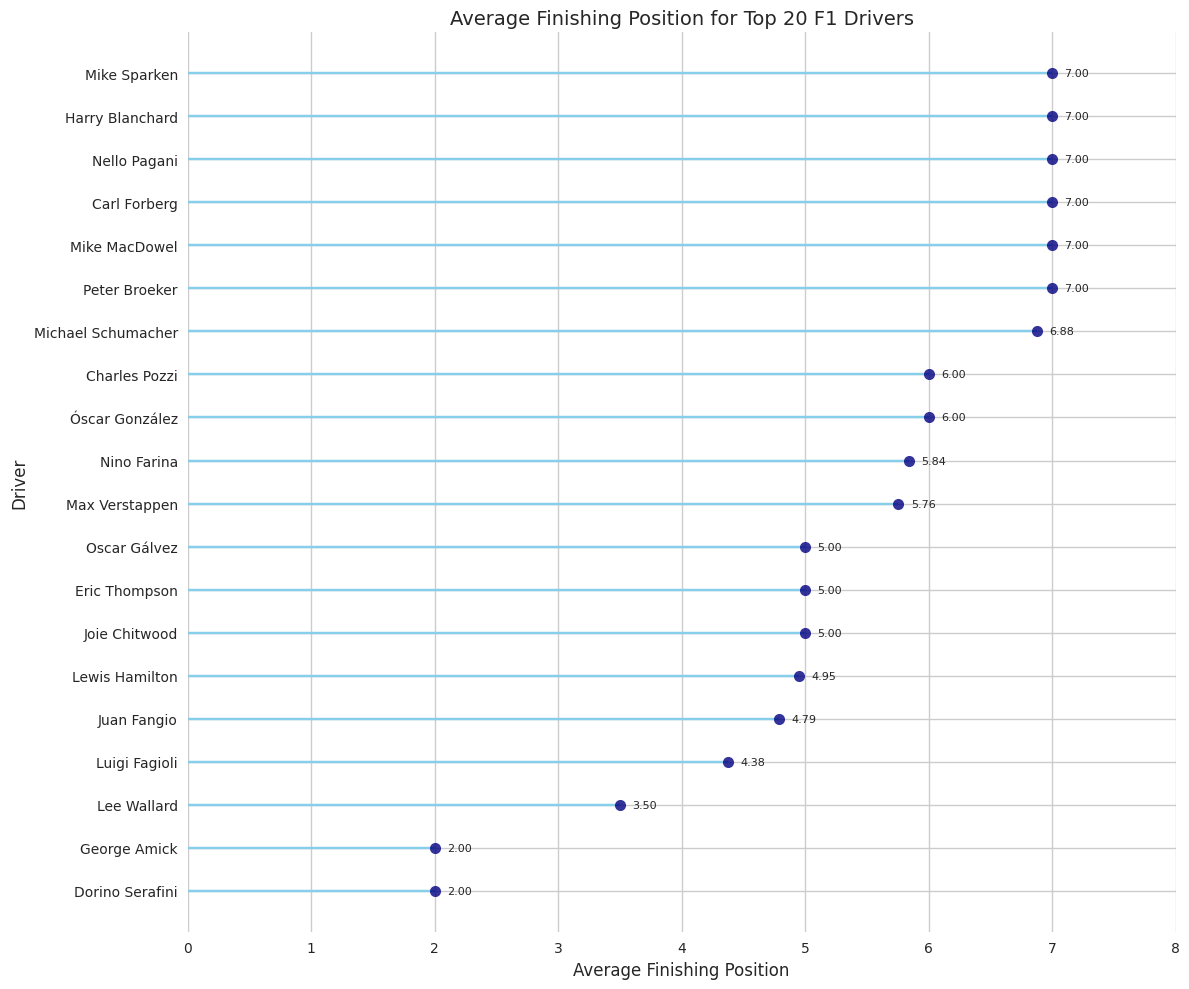

In [ ]:
avg_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_position = avg_position.merge(drivers[['driverId', 'surname', 'forename']], on='driverId')

avg_position = avg_position.sort_values('positionOrder').head(20)

avg_position['full_name'] = avg_position['forename'] + ' ' + avg_position['surname']

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

# Plot lines
plt.hlines(y=avg_position['full_name'], xmin=0, xmax=avg_position['positionOrder'], color='skyblue')
# Plot points
plt.plot(avg_position['positionOrder'], avg_position['full_name'], "o", markersize=8, color='navy', alpha=0.8)

plt.xlabel('Average Finishing Position', fontsize=12)
plt.ylabel('Driver', fontsize=12)
plt.title('Average Finishing Position for Top 20 F1 Drivers', fontsize=14)
plt.xlim(0, max(avg_position['positionOrder']) + 1)

# Add value labels
for i, v in enumerate(avg_position['positionOrder']):
    plt.text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

**the driver with most Pole Position all times**

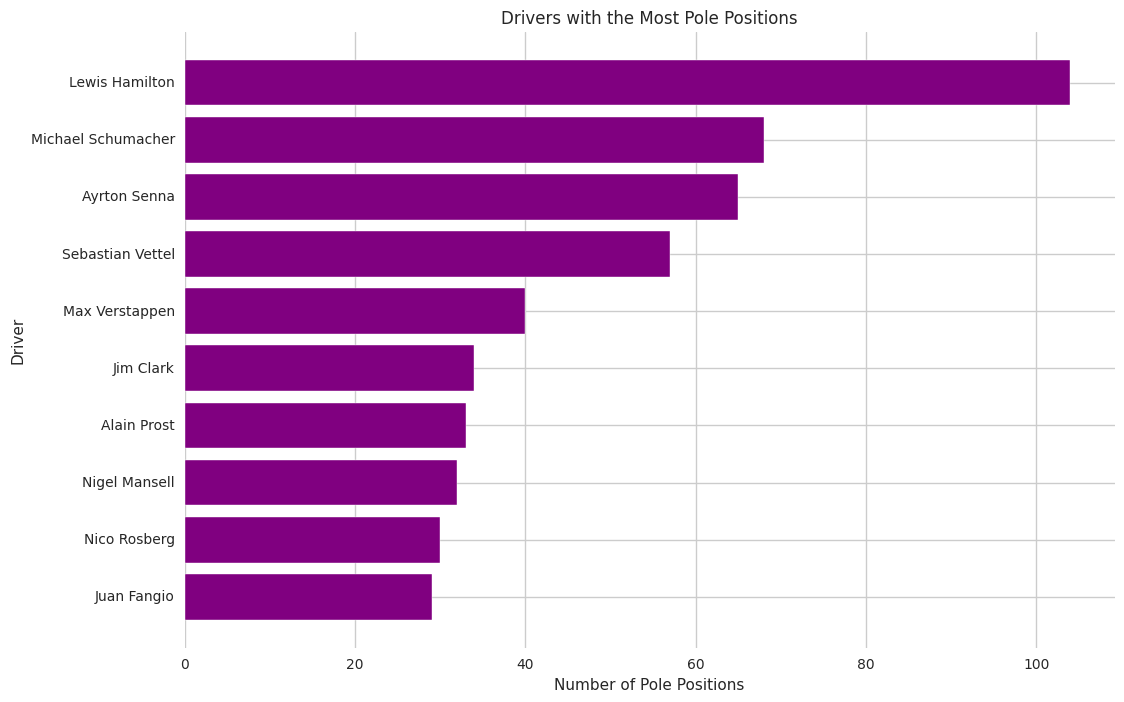

In [ ]:
driver_quali = results.merge(drivers, on = 'driverId',how = 'left')
driver_quali['full_name'] = driver_quali['forename'] + ' ' + driver_quali['surname']
driver_quali = driver_quali[['full_name','grid','position']]

quali_wins = driver_quali[driver_quali['grid'] == 1].groupby('full_name')['grid'].sum().reset_index(
                                        name = 'grid poles').sort_values('grid poles',ascending = False)

quali_wins = quali_wins.reset_index(col_level=0)
quali_wins.drop('index',axis = 1,inplace = True)
quali_wins.head(10)

results_with_drivers = results.merge(drivers, on='driverId', how='left')

results_with_drivers['full_name'] = results_with_drivers['forename'] + ' ' + results_with_drivers['surname']

quali_wins = results_with_drivers[results_with_drivers['grid'] == 1]
quali_wins_count = quali_wins.groupby('full_name')['grid'].count().reset_index(name='pole_positions')

quali_wins_sorted = quali_wins_count.sort_values(by='pole_positions', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(quali_wins_sorted['full_name'], quali_wins_sorted['pole_positions'], color='purple')
plt.title('Drivers with the Most Pole Positions')
plt.xlabel('Number of Pole Positions')
plt.ylabel('Driver')
plt.yticks(fontsize=10, va='center')
plt.gca().invert_yaxis()
plt.show()


**Top 5 drivers with the most wins per season**

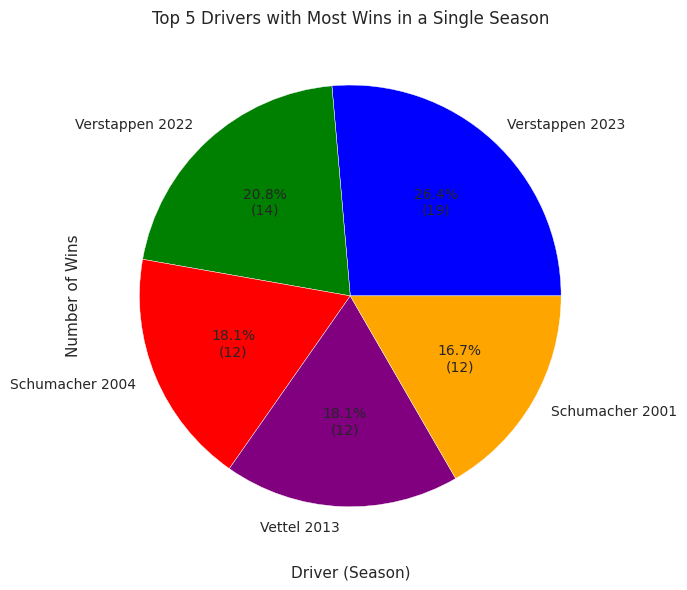

In [ ]:
results_with_drivers = results.merge(drivers, on='driverId', how='left')
results_with_races = results_with_drivers.merge(races, on='raceId', how='left')

wins = results_with_races[results_with_races['positionOrder'] == 1]

wins_count = wins.groupby(['surname', 'year']).size().reset_index(name='wins')

top_5_wins_single_season = wins_count.sort_values(by='wins', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.pie(top_5_wins_single_season['wins'],
        labels=top_5_wins_single_season['surname'] + ' ' + top_5_wins_single_season['year'].astype(str),
        colors=['blue', 'green', 'red', 'purple', 'orange'],
        autopct = lambda pct: "{:.1f}%\n({:d})".format(pct, int(pct/100.*top_5_wins_single_season['wins'].sum())))

plt.title('Top 5 Drivers with Most Wins in a Single Season')
plt.xlabel('Driver (Season)')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

**What is the distribution of driver ages at their first F1 race?**

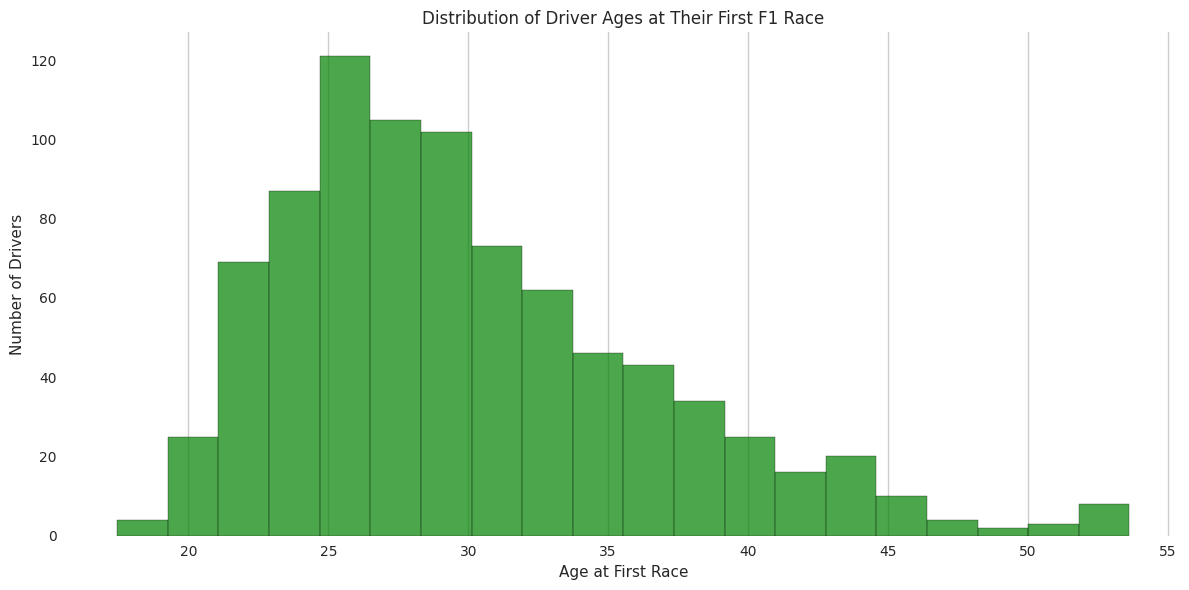

In [ ]:
results_with_races = results.merge(races, on='raceId', how='left')

results_with_drivers = results_with_races.merge(drivers, on='driverId', how='left')

results_with_drivers['dob'] = pd.to_datetime(results_with_drivers['dob'])
results_with_drivers['race_date'] = pd.to_datetime(results_with_drivers['date'])
results_with_drivers['age_at_race'] = (results_with_drivers['race_date'] - results_with_drivers['dob']).dt.days / 365.25

# first race for each driver
first_race_by_driver = results_with_drivers.groupby('driverId')['age_at_race'].min().reset_index()

plt.figure(figsize=(12, 6))
plt.hist(first_race_by_driver['age_at_race'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Driver Ages at Their First F1 Race')
plt.xlabel('Age at First Race')
plt.ylabel('Number of Drivers')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**distribution of top 15 Nationalities**

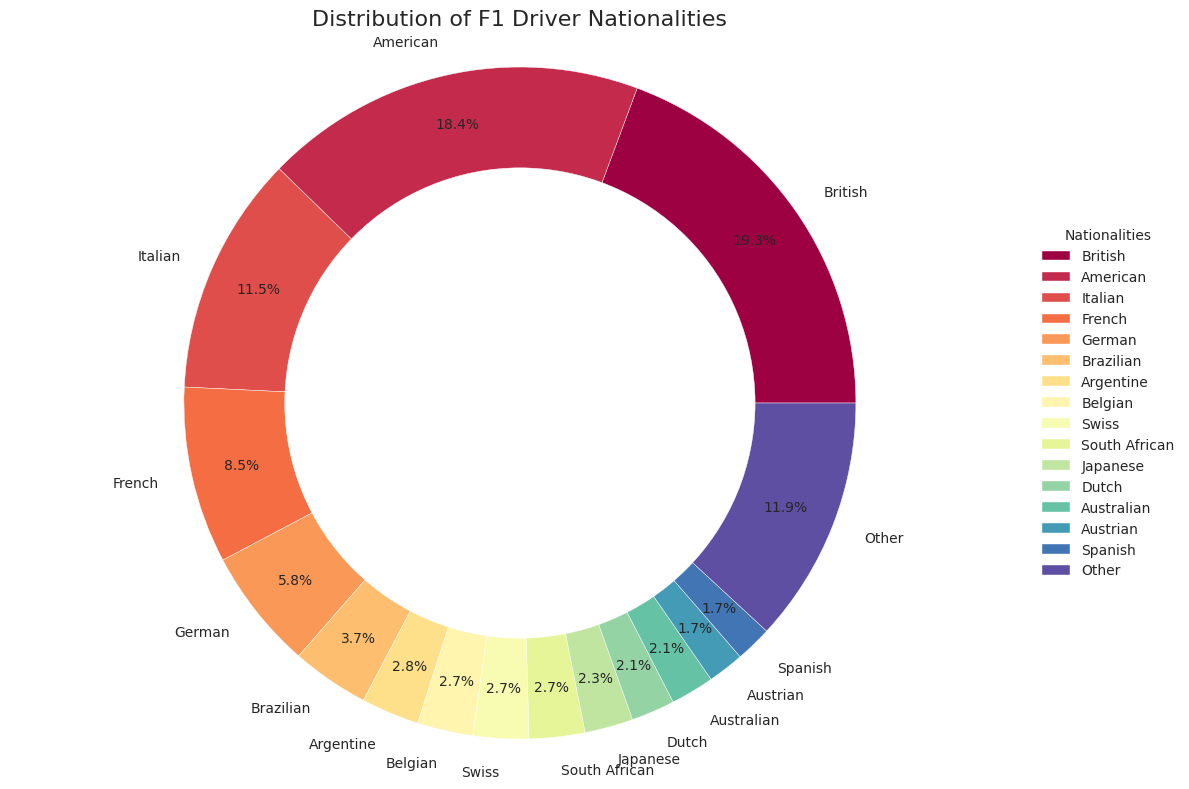

In [ ]:
nationality_counts = drivers['nationality'].value_counts().reset_index()
nationality_counts.columns = ['nationality', 'count']
nationality_counts = nationality_counts.sort_values(by='count', ascending=False)

top_15 = nationality_counts.head(15)
other = pd.DataFrame({'nationality': ['Other'],
                      'count': [nationality_counts.iloc[15:]['count'].sum()]})
plot_data = pd.concat([top_15, other])

plt.figure(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(plot_data)))
wedges, texts, autotexts = plt.pie(plot_data['count'], labels=plot_data['nationality'],
                                   autopct='%1.1f%%', pctdistance=0.85, colors=colors)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title("Distribution of F1 Driver Nationalities", fontsize=16)

plt.legend(wedges, plot_data['nationality'],
           title="Nationalities",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

**Age vs. Race Experience: Analyzing the Top 10 Youngest F1 Drivers**

In [ ]:
current_date = datetime.now()
drivers['age'] = drivers['dob'].apply(lambda x: calculate_age(x, current_date))
race_counts = results.groupby('driverId').size().reset_index(name='races_count')
driver_data = drivers.merge(race_counts, on='driverId', how='left')
driver_data['races_count'] = driver_data['races_count'].fillna(0)
top_10_youngest_drivers = driver_data.sort_values(by='age').head(10)

plt.figure(figsize=(14, 10))
scatter = plt.scatter(top_10_youngest_drivers['age'], top_10_youngest_drivers['races_count'],
                      c=top_10_youngest_drivers['races_count'], cmap='viridis',
                      s=100, alpha=0.7)

plt.title('Top 10 Youngest F1 Drivers: Age vs Race Experience', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Races Participated', fontsize=12)
plt.colorbar(scatter, label='Number of Races')

# Add driver names
for i, txt in enumerate(top_10_youngest_drivers['surname']):
    plt.annotate(txt, (top_10_youngest_drivers['age'].iloc[i], top_10_youngest_drivers['races_count'].iloc[i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

# Trend line
sns.regplot(x='age', y='races_count', data=top_10_youngest_drivers, scatter=False, color='red')

plt.tight_layout()
plt.show()
print(top_10_youngest_drivers[['surname', 'age', 'races_count', 'nationality']])

**The top 5 youngest driver age at first win**

In [ ]:
winners_df = results[results['positionOrder'] == 1]
first_wins_df = winners_df.sort_values(by=['driverId', 'raceId']).drop_duplicates(subset=['driverId'], keep='first')
first_wins_df = first_wins_df.merge(races[['raceId', 'date', 'circuitId']], on='raceId')
first_wins_df = first_wins_df.merge(drivers[['driverId', 'dob', 'surname', 'forename']], on='driverId')
first_wins_df = first_wins_df.merge(circuits[['circuitId', 'name']], on='circuitId')

# Convert 'date' and 'dob' columns to datetime objects
first_wins_df['date'] = pd.to_datetime(first_wins_df['date'])
first_wins_df['dob'] = pd.to_datetime(first_wins_df['dob'])

first_wins_df['age_at_first_win'] = first_wins_df.apply(lambda row: calculate_age(row['dob'], row['date']), axis=1)
top_5_youngest_first_win = first_wins_df.sort_values(by='age_at_first_win').head(5)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

colors = sns.color_palette("husl", 5)

bars = plt.bar(top_5_youngest_first_win['forename'] + ' ' + top_5_youngest_first_win['surname'],
               top_5_youngest_first_win['age_at_first_win'],
               color=colors)

plt.title('Top 5 Youngest F1 Drivers at First Win', fontsize=20, fontweight='bold')
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Age at First Win', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Teams/Constructors

In [ ]:
team = results.merge(constructors, on='constructorId', how='left')
team

**Historic overall points of top 10 constructors**

In [ ]:
historic_points = team.groupby('name').agg({'points':'sum'}).sort_values('points',ascending=False).reset_index().head(10)
historic_points

plt.figure(figsize=(12, 6))
plt.bar(historic_points['name'], historic_points['points'], color='green', alpha=0.7)
plt.title('Historic Overall Points of Top 10 Constructors')
plt.xlabel('Constructor')
plt.ylabel('Total Points')
plt.tight_layout()
plt.show()
historic_points

**F1 top 15 Constructor Championships by Decade**

In [ ]:
championships_data = constructor_standings.merge(races[['raceId', 'year']], on='raceId')

championships_data = championships_data[championships_data['position'] == 1]
championships_data['decade'] = (championships_data['year'] // 10) * 10
championships_count = championships_data.groupby(['constructorId', 'decade']).size().unstack(fill_value=0)
constructor_names = constructors.set_index('constructorId')['name']
championships_count.index = constructor_names[championships_count.index]
championships_count['total'] = championships_count.sum(axis=1)
championships_count = championships_count.sort_values('total', ascending=False).drop('total', axis=1)

top_15_constructors = championships_count.head(15)

plt.figure(figsize=(14, 10))
sns.heatmap(top_15_constructors, annot=True, cmap='YlOrRd', fmt='d', cbar_kws={'label': 'Number of Championships'})

plt.title('F1 Constructor Championships by Decade', fontsize=20, fontweight='bold')
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Constructor', fontsize=14)
plt.tight_layout()
plt.show()

**Top 10 Constructor Performance: Average Position vs Wins and correlations**

In [ ]:
team_wins = results[results['positionOrder'] == 1].groupby('constructorId').size().reset_index(name='wins')
team_avg_position = results.groupby('constructorId')['positionOrder'].mean().reset_index()
team_performance_corr = team_avg_position.merge(team_wins, on='constructorId')
correlation = team_performance_corr['positionOrder'].corr(team_performance_corr['wins'])
correlation

team_wins = results[results['positionOrder'] == 1].groupby('constructorId').size().reset_index(name='wins')
team_avg_position = results.groupby('constructorId')['positionOrder'].mean().reset_index()
team_performance_corr = team_avg_position.merge(team_wins, on='constructorId')
top_10_constructors = team_performance_corr.nlargest(10, 'wins')
top_10_constructors = top_10_constructors.merge(constructors[['constructorId', 'name']], on='constructorId')

correlation = top_10_constructors['positionOrder'].corr(top_10_constructors['wins'])

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x="positionOrder", y="wins", data=top_10_constructors,
                          size="wins", sizes=(100, 1000), legend=False)

plt.xlabel('Average Position')
plt.ylabel('Number of Wins')
plt.title('Top 10 Constructor Performance: Average Position vs Wins')
plt.gca().invert_xaxis()

plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
         verticalalignment='top')
for idx, row in top_10_constructors.iterrows():
    plt.annotate(row['name'],
                 (row['positionOrder'], row['wins']),
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
print(top_10_constructors[['name', 'positionOrder', 'wins']])

**Top 10 Constructor by Average Points per Race**

<ipython-input-20-ca3704ebfcc3>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = team[team['name'].isin(best.name)].groupby('name').apply(func).sort_values(ascending=False).reset_index(name = 'points_per_race')


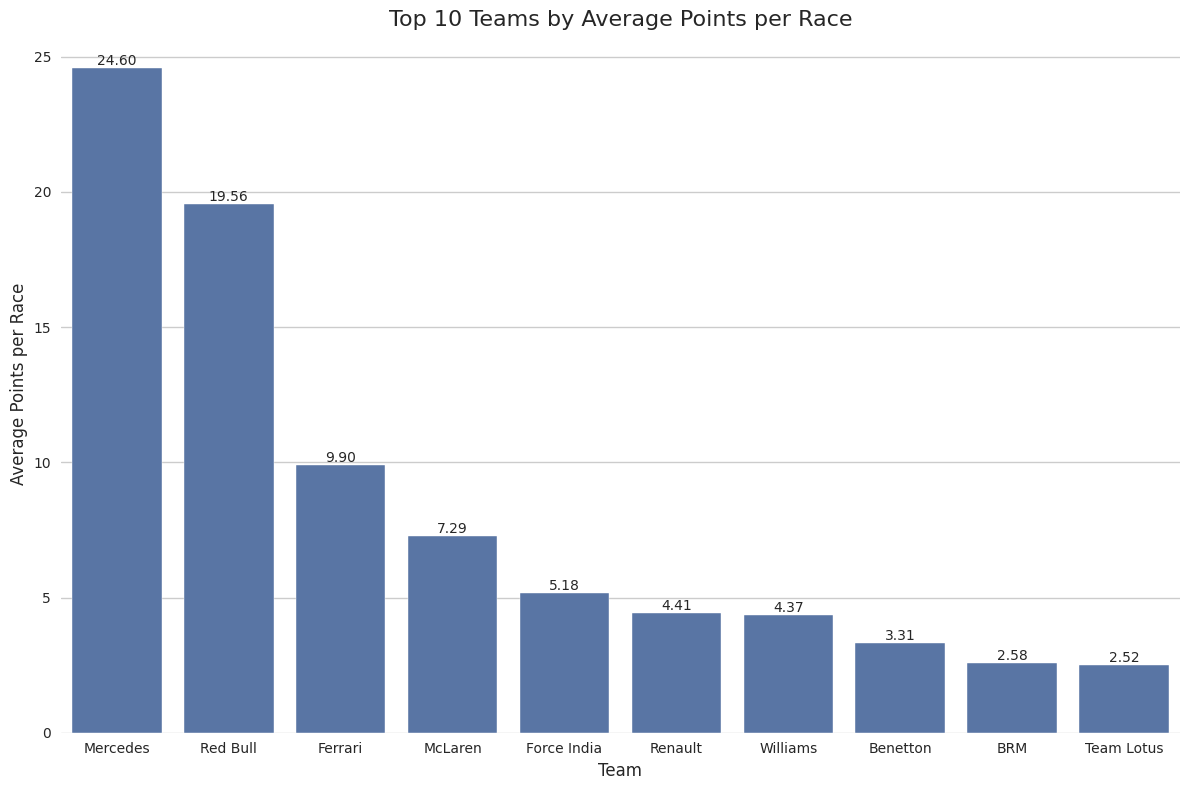

In [ ]:
best = team[['name','points','raceId']]
best = best.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(name = 'races')
best = best[best['races'] >= 100]
func = lambda x: x.points.sum()/x.raceId.nunique()
data = team[team['name'].isin(best.name)].groupby('name').apply(func).sort_values(ascending=False).reset_index(name = 'points_per_race')
data.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='points_per_race', data=data.head(10))

plt.title('Top 10 Teams by Average Points per Race', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Average Points per Race', fontsize=12)

for i, v in enumerate(data['points_per_race'].head(10)):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Which constructors have won the most races?**

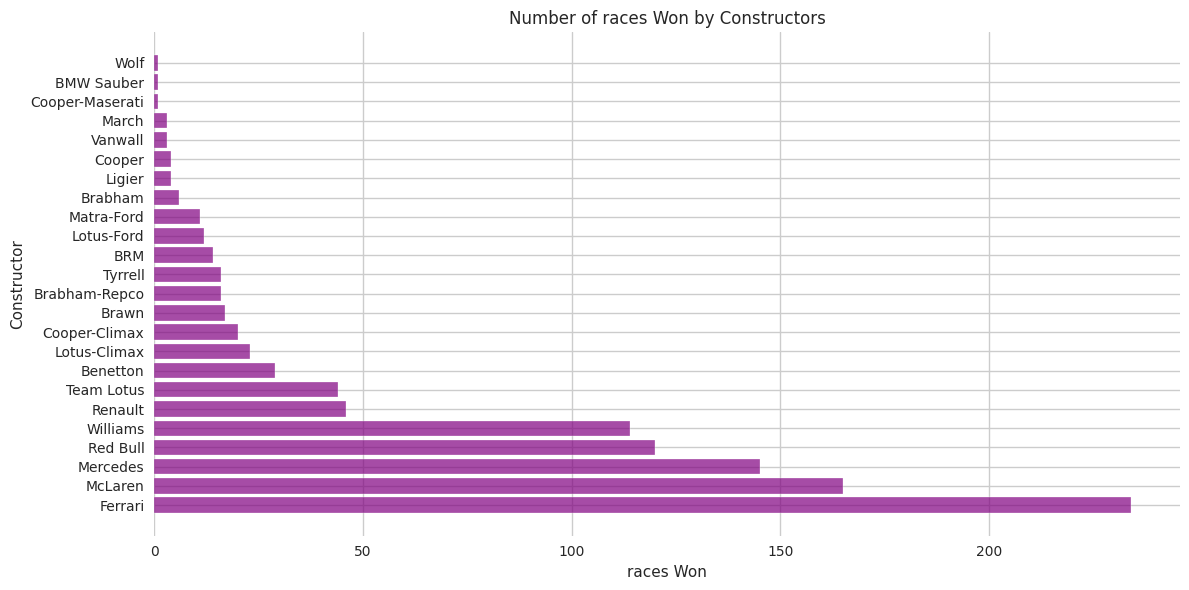

In [ ]:
winning_constructors = constructor_standings[constructor_standings['position'] == 1]

championships_by_constructor = winning_constructors['constructorId'].value_counts().reset_index()
championships_by_constructor.columns = ['constructorId', 'Championships Won']
championships_by_constructor = championships_by_constructor.merge(constructors, on='constructorId', how='left')

plt.figure(figsize=(12, 6))
plt.barh(championships_by_constructor['name'], championships_by_constructor['Championships Won'], color='purple', alpha=0.7)
plt.title('Number of races Won by Constructors')
plt.xlabel('races Won')
plt.ylabel('Constructor')
plt.tight_layout()
plt.show()

**Which constructor has won the most first and second places in the same race?**

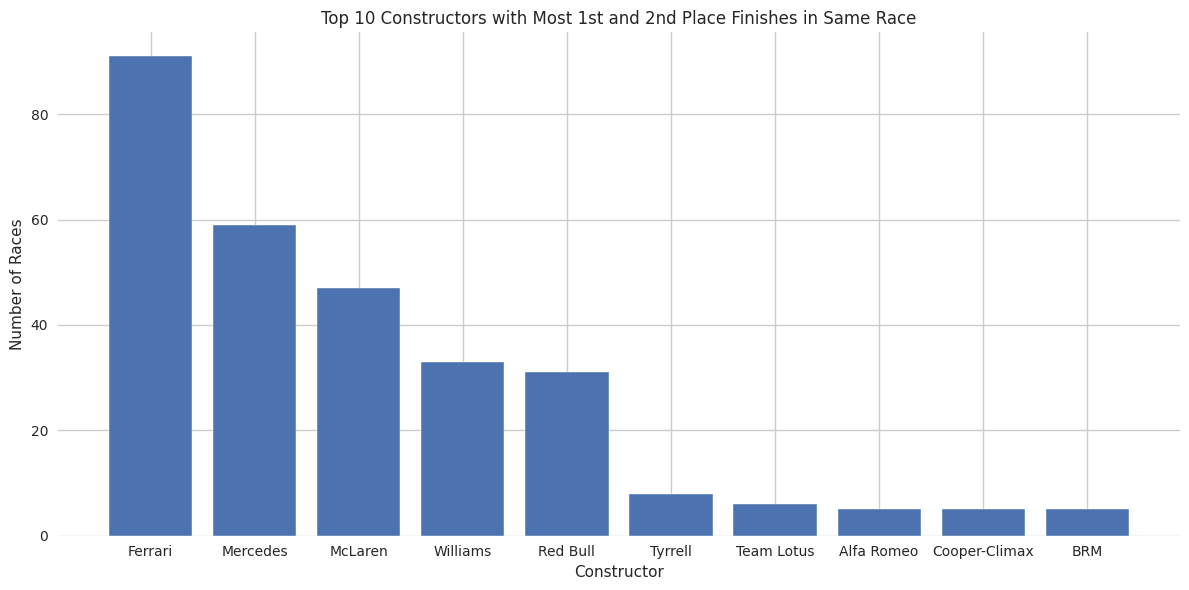

In [ ]:
results_with_names = results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
first_second_places = results_with_names[(results_with_names['positionOrder'] == 1) | (results_with_names['positionOrder'] == 2)]
constructor_wins = first_second_places.groupby(['raceId', 'name']).size().reset_index(name='count')
constructor_wins = constructor_wins[constructor_wins['count'] == 2]

constructor_wins_count = constructor_wins['name'].value_counts().reset_index()
constructor_wins_count.columns = ['Constructor', 'Count']

plt.figure(figsize=(12, 6))
plt.bar(constructor_wins_count['Constructor'][:10], constructor_wins_count['Count'][:10])
plt.title('Top 10 Constructors with Most 1st and 2nd Place Finishes in Same Race')
plt.xlabel('Constructor')
plt.ylabel('Number of Races')
plt.tight_layout()
plt.show()

**Wins by season for top 5 constructors (2000-2024)**

Top 5 constructors by number of wins (2000-2024):
name
Ferrari     120
Red Bull    120
Mercedes    118
McLaren      61
Renault      20
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

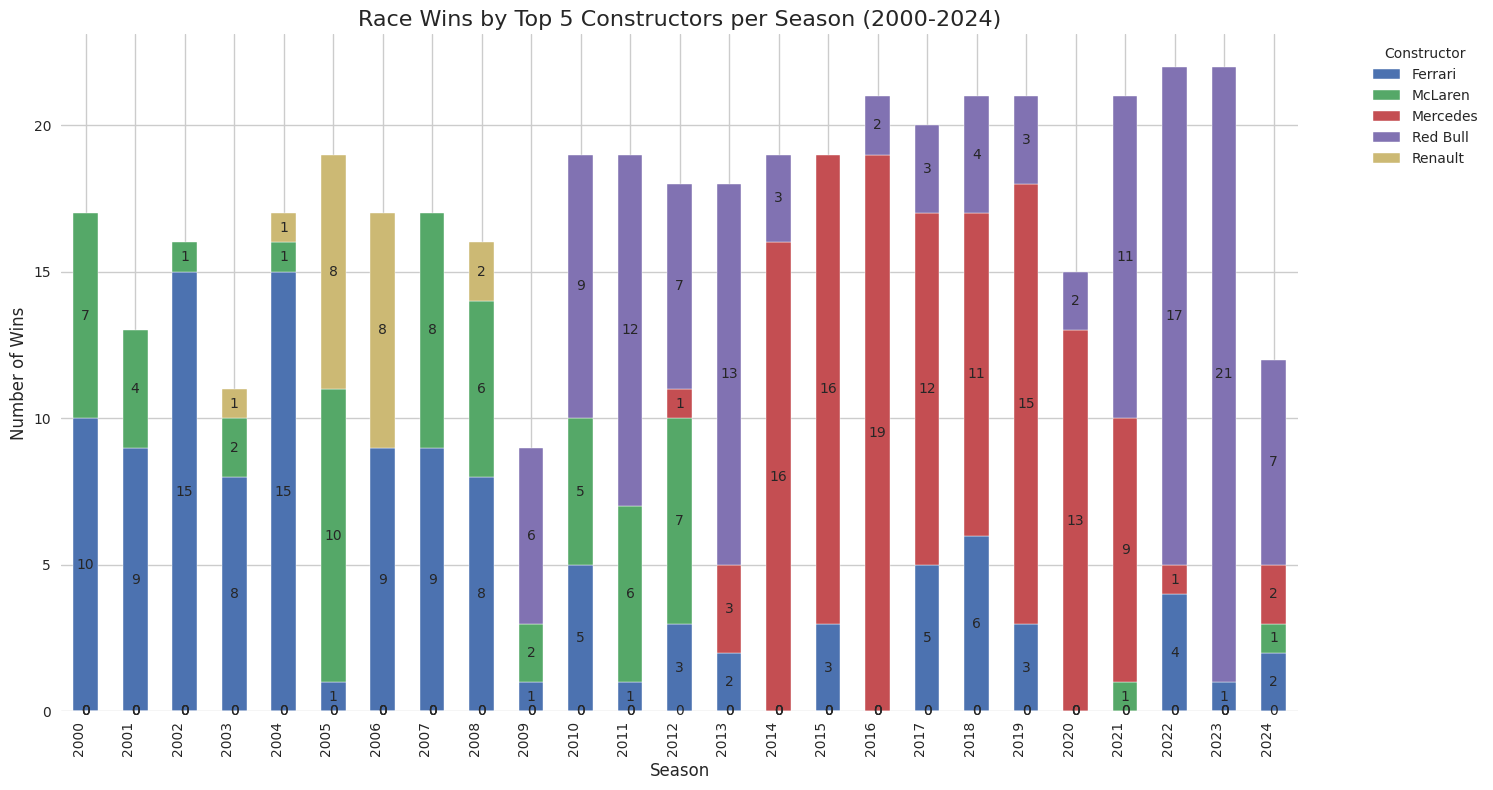

In [ ]:
results['position'] = pd.to_numeric(results['position'], errors='coerce')
winners = results[results['position'] == 1].merge(constructors[['constructorId', 'name']], on='constructorId')
winners_2000_2024 = winners.merge(races[['raceId', 'year']], on='raceId')
winners_2000_2024 = winners_2000_2024[(winners_2000_2024['year'] >= 2000) & (winners_2000_2024['year'] <= 2024)]

constructor_wins = winners_2000_2024['name'].value_counts().nlargest(5)

print("Top 5 constructors by number of wins (2000-2024):")
print(constructor_wins)

top_5_constructors = constructor_wins.index.tolist()
top_5_winners = winners_2000_2024[winners_2000_2024['name'].isin(top_5_constructors)]

wins_by_season = pd.pivot_table(top_5_winners, values='resultId', index='year',
                                columns='name', aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 8))
ax = wins_by_season.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Race Wins by Top 5 Constructors per Season (2000-2024)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()


**Fastest pit stops by constructor in 2023 season**

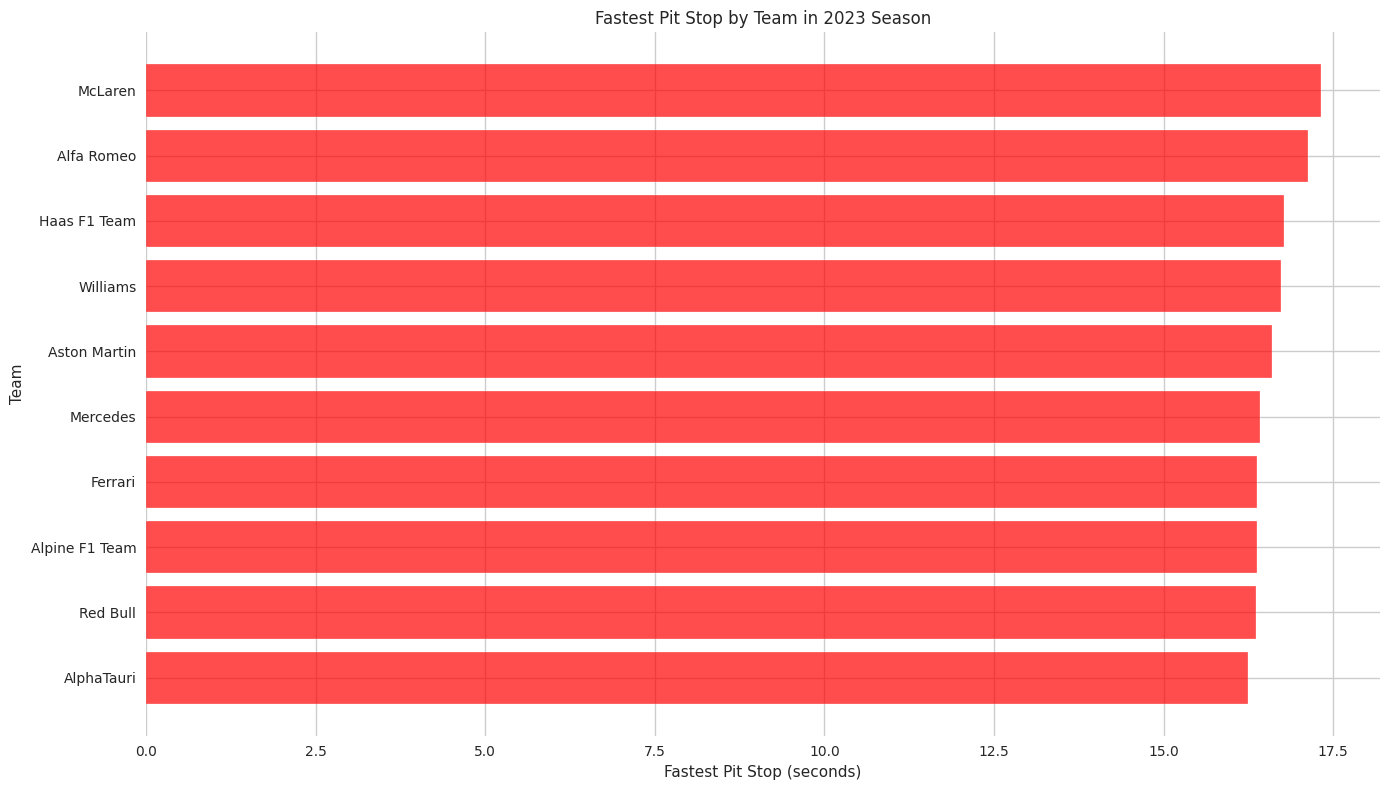

In [ ]:
#merging data frames for comfortable work.
pit_stops_with_results = pit_stops.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'], how='left')
pit_stops_with_teams = pit_stops_with_results.merge(constructors, on='constructorId', how='left')
pit_stops_with_teams_races = pit_stops_with_teams.merge(races[['raceId', 'year']], on='raceId', how='left')

pit_stops_2020 = pit_stops_with_teams_races[pit_stops_with_teams_races['year'] == 2023]

fastest_pit_stop_by_team_2023 = pit_stops_2020.groupby('name')['milliseconds'].min().reset_index()
fastest_pit_stop_by_team_2023 = fastest_pit_stop_by_team_2023.rename(columns={'name': 'Team', 'milliseconds': 'Fastest Pit Stop (ms)'})

fastest_pit_stop_by_team_2023['Fastest Pit Stop (s)'] = fastest_pit_stop_by_team_2023['Fastest Pit Stop (ms)'] / 1000
fastest_pit_stop_by_team_sorted_2020 = fastest_pit_stop_by_team_2023.sort_values(by='Fastest Pit Stop (s)')

plt.figure(figsize=(14, 8))
plt.barh(fastest_pit_stop_by_team_sorted_2020['Team'], fastest_pit_stop_by_team_sorted_2020['Fastest Pit Stop (s)'], color='red', alpha=0.7)
plt.title('Fastest Pit Stop by Team in 2023 Season')
plt.xlabel('Fastest Pit Stop (seconds)')
plt.ylabel('Team')
plt.grid(True)
plt.tight_layout()
plt.show()


**Average Finishing Position of Top 20 Drivers Across Constructors**


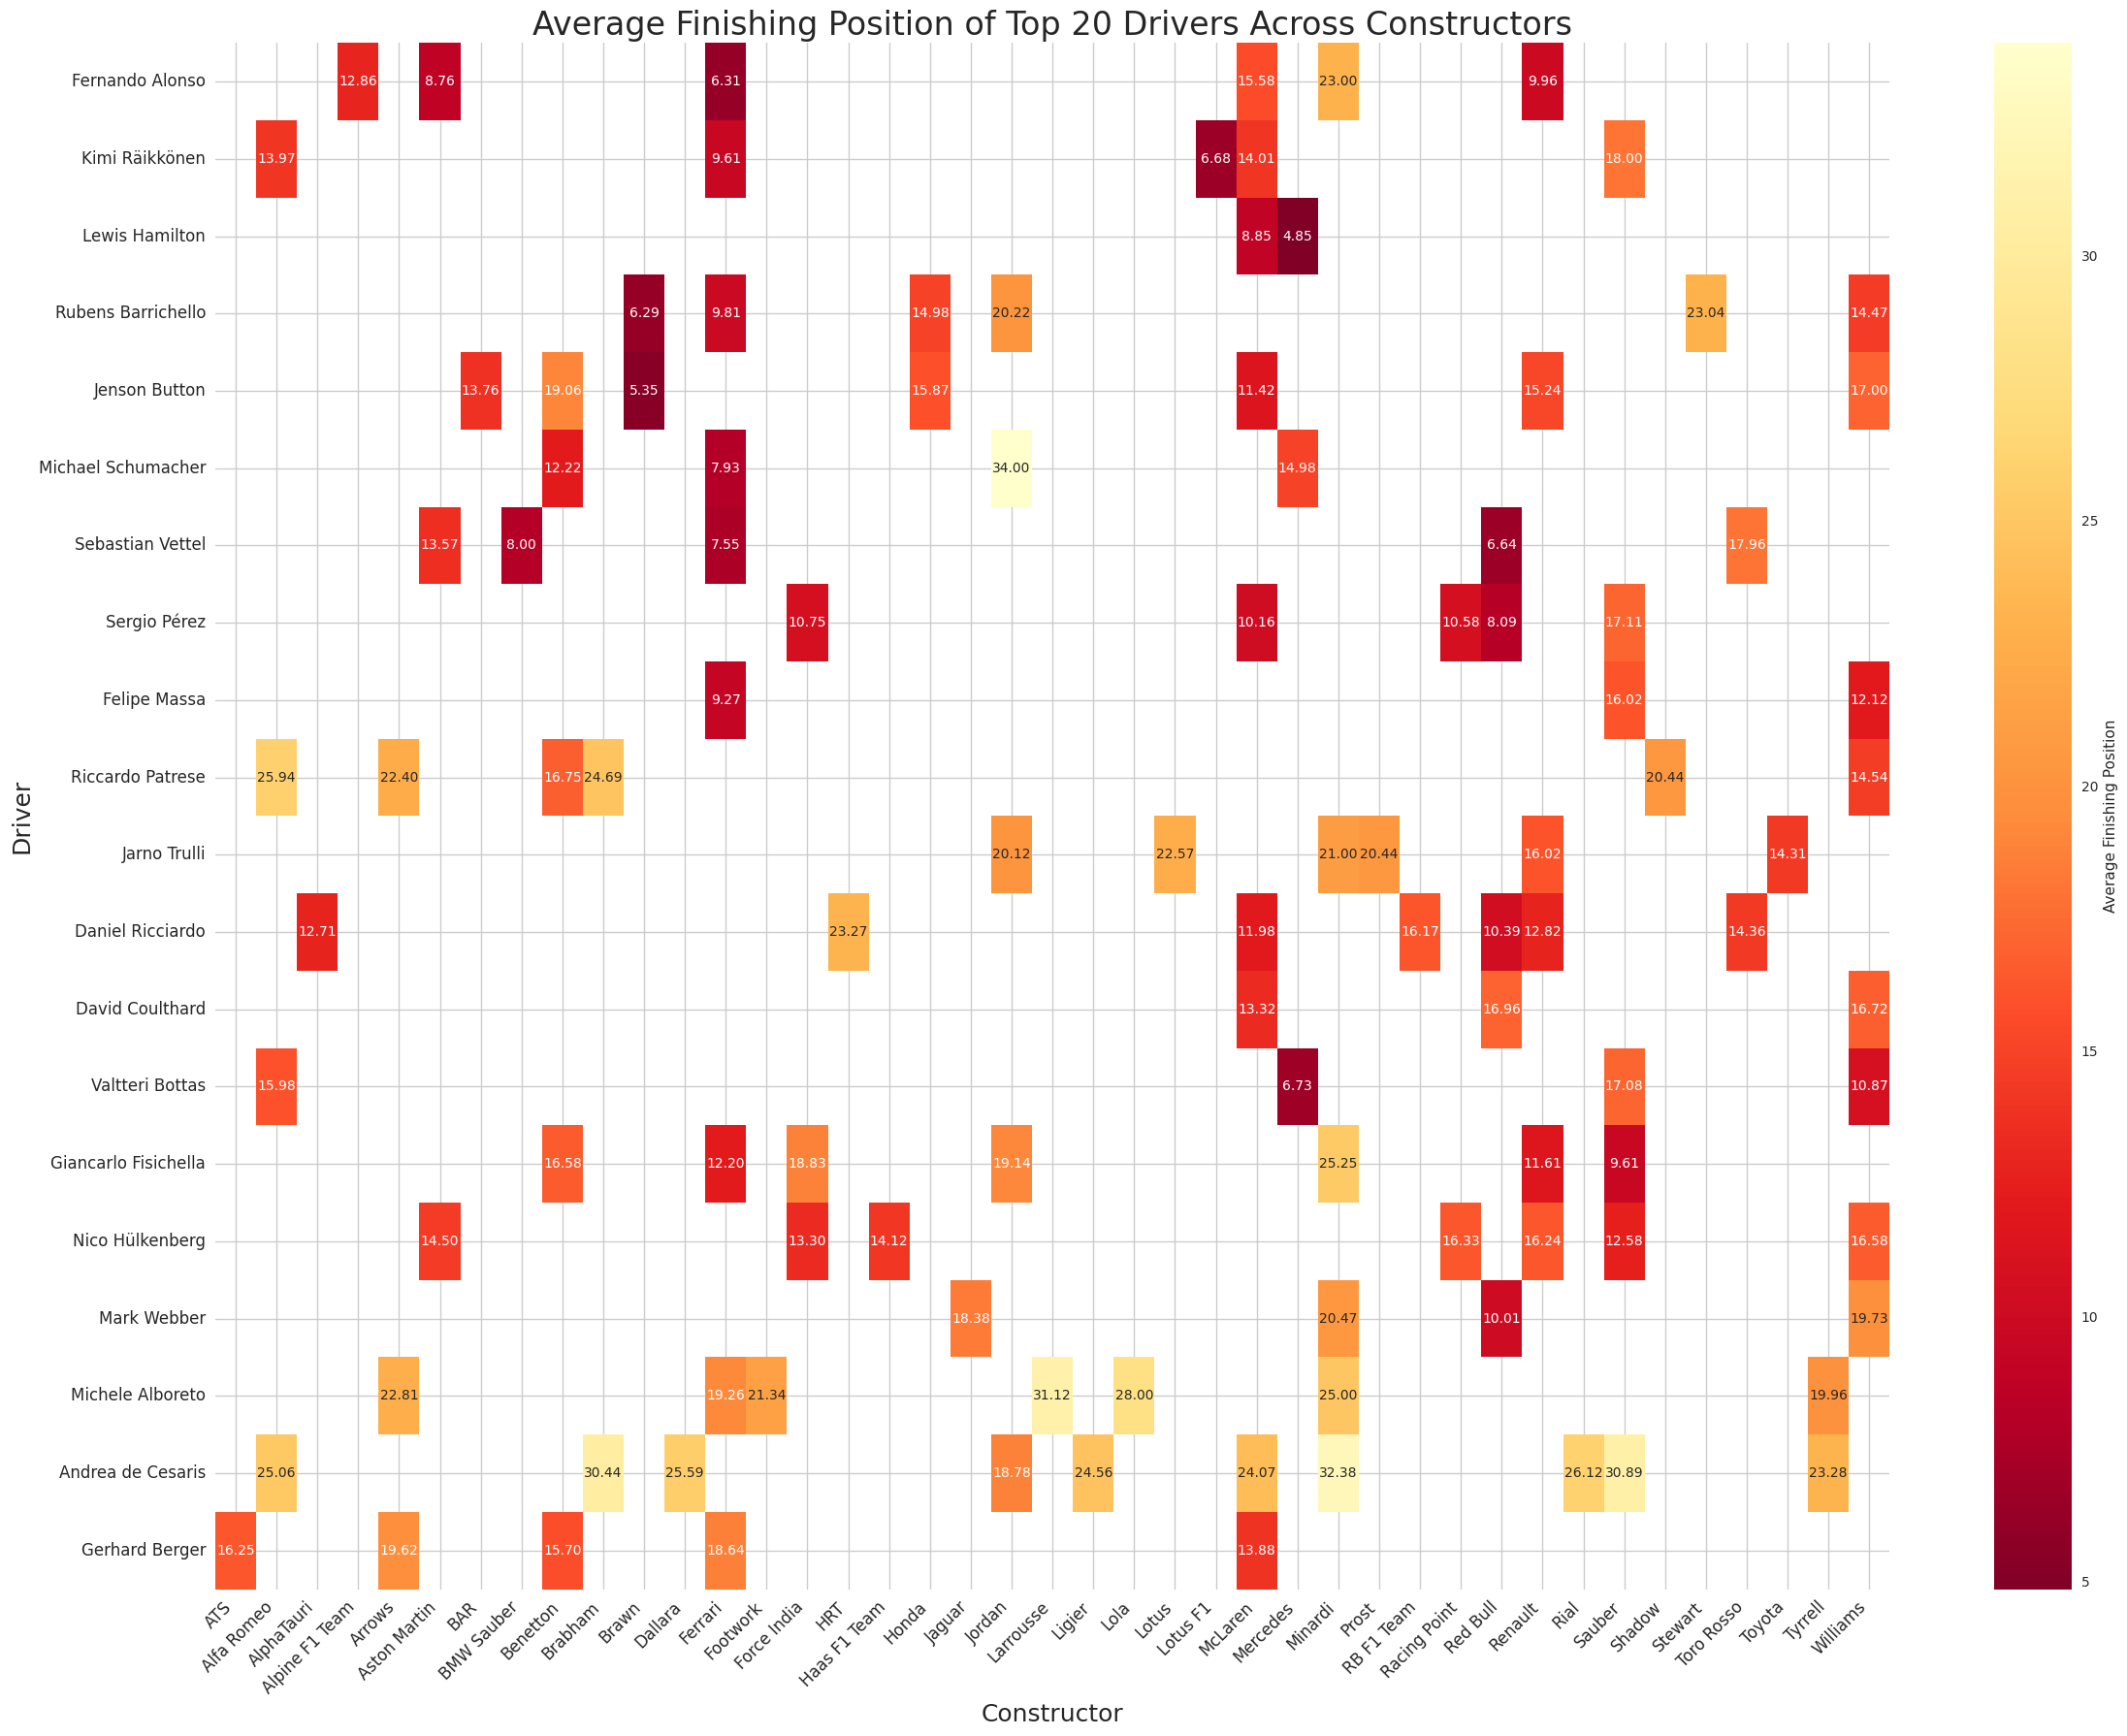

In [ ]:
merged_data = results.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')
merged_data = merged_data.merge(constructors[['constructorId', 'name']], on='constructorId')
merged_data['driver_name'] = merged_data['forename'] + ' ' + merged_data['surname']
merged_data['position'] = pd.to_numeric(merged_data['position'], errors='coerce')
max_position = merged_data['position'].max()
merged_data['position'] = merged_data['position'].fillna(max_position + 1)
avg_positions = merged_data.groupby(['driver_name', 'name'])['position'].mean().reset_index()
pivot_data = avg_positions.pivot(index='driver_name', columns='name', values='position')
top_drivers = merged_data['driver_name'].value_counts().nlargest(20).index
heatmap_data = pivot_data.loc[top_drivers].dropna(axis=1, how='all')

plt.figure(figsize=(24, 18))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd_r',
            cbar_kws={'label': 'Average Finishing Position'},
            annot_kws={'size': 10})

plt.title('Average Finishing Position of Top 20 Drivers Across Constructors', fontsize=24)
plt.xlabel('Constructor', fontsize=18)
plt.ylabel('Driver', fontsize=18)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

## Circuits

**Average Lap Times by Circuit in 2022**

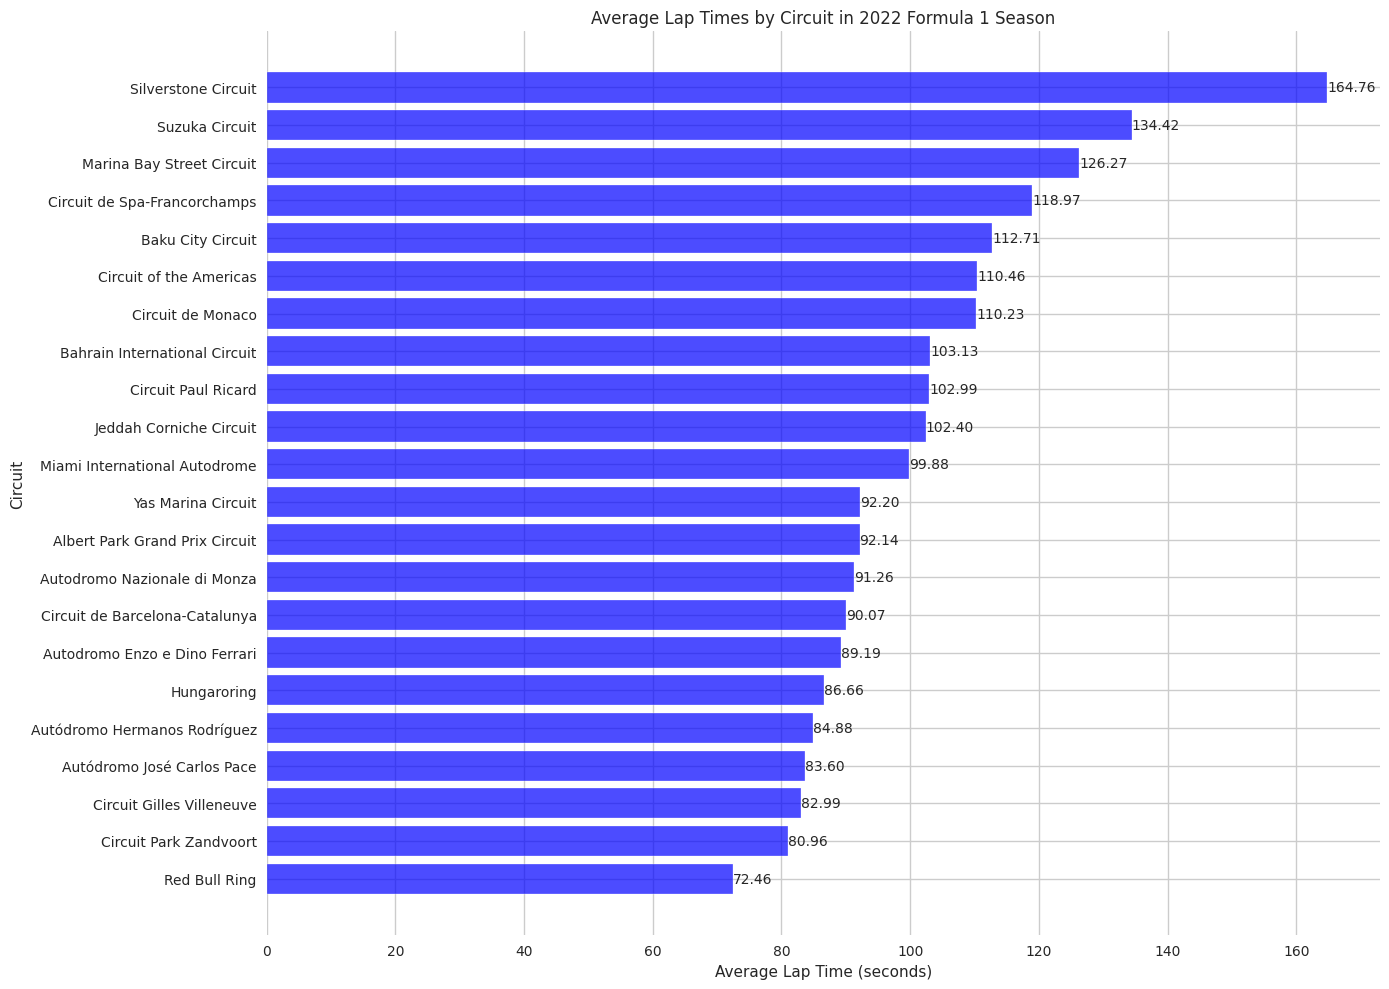

In [ ]:
lap_times_with_races = lap_times.merge(races, on='raceId', how='left')
lap_times_2022 = lap_times_with_races[lap_times_with_races['year'] == 2022]

# Calculate average lap time for each circuit
avg_lap_times = lap_times_2022.groupby('circuitId')['milliseconds'].mean().reset_index()
avg_lap_times['avg_lap_time_seconds'] = avg_lap_times['milliseconds'] / 1000
avg_lap_times = avg_lap_times.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')
avg_lap_times_sorted = avg_lap_times.sort_values(by='avg_lap_time_seconds', ascending=True)

plt.figure(figsize=(14, 10))
plt.barh(avg_lap_times_sorted['name'], avg_lap_times_sorted['avg_lap_time_seconds'], color='blue', alpha=0.7)
plt.title('Average Lap Times by Circuit in 2022 Formula 1 Season')
plt.xlabel('Average Lap Time (seconds)')
plt.ylabel('Circuit')
plt.grid(True, axis='x')

# Add value labels on top of each bar
for i, v in enumerate(avg_lap_times_sorted['avg_lap_time_seconds']):
    plt.text(v, i, f'{v:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()


**Which Driver holds the Lap record per circuit?**

<ipython-input-27-49c5fcebf391>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_record_details['lap_time_formatted'] = lap_record_details['milliseconds'].apply(convert_milliseconds)


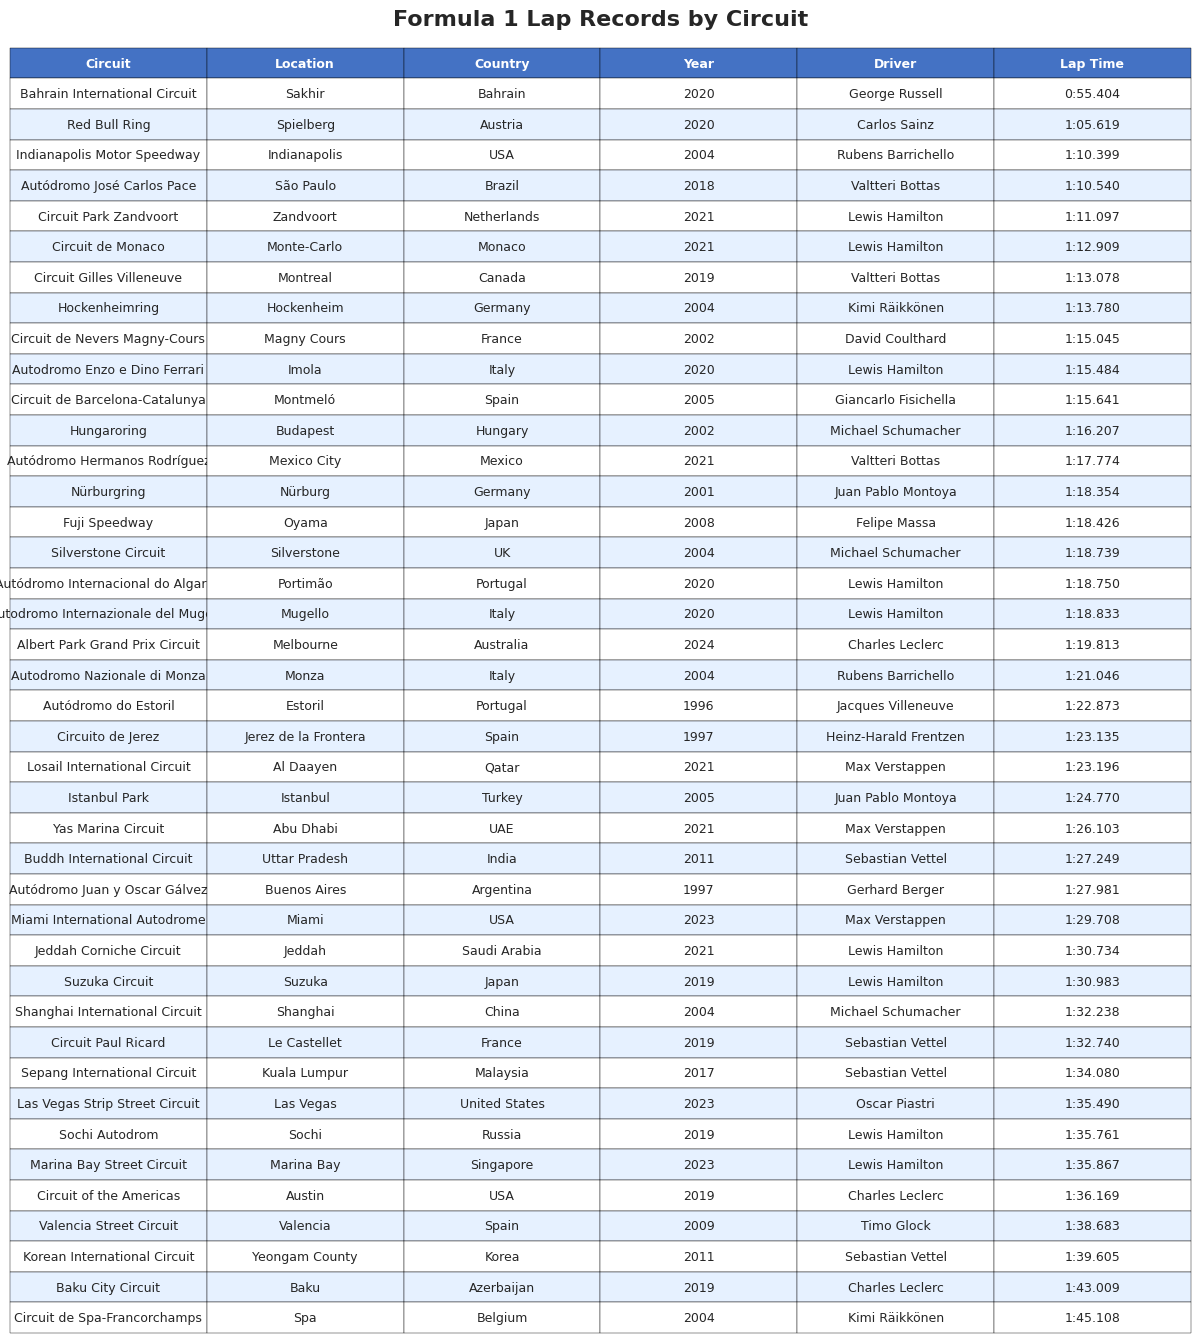

In [ ]:
lap_times_with_circuits = lap_times.merge(races[['raceId', 'circuitId', 'year']], on='raceId')

# minimum lap time for each circuit
lap_records = lap_times_with_circuits.loc[lap_times_with_circuits.groupby('circuitId')['milliseconds'].idxmin()]
lap_records = lap_records.merge(drivers, on='driverId').merge(circuits, on='circuitId')
lap_record_details = lap_records[['circuitId', 'name', 'location', 'country', 'year', 'forename', 'surname', 'milliseconds']]

# Convert lap time from milliseconds
lap_record_details['lap_time_formatted'] = lap_record_details['milliseconds'].apply(convert_milliseconds)

lap_record_details_sorted = lap_record_details.sort_values('milliseconds')
lap_record_details_sorted.reset_index(drop=True, inplace=True)

def create_lap_records_table(data):
    fig, ax = plt.subplots(figsize=(12, len(data) * 0.33))
    ax.axis('off')

    columns = ['Circuit', 'Location', 'Country', 'Year', 'Driver', 'Lap Time']
    cell_text = []

    for _, row in data.iterrows():
        cell_text.append([
            row['name'],
            row['location'],
            row['country'],
            str(row['year']),
            f"{row['forename']} {row['surname']}",
            row['lap_time_formatted']
        ])

    table = ax.table(cellText=cell_text,
                     colLabels=columns,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#4472C4')
            cell.set_text_props(color='white')
        else:
            cell.set_facecolor('#E6F1FF' if row % 2 == 0 else 'white')

    plt.title('Formula 1 Lap Records by Circuit', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()

    return fig

fig = create_lap_records_table(lap_record_details_sorted)
plt.show()

**Which circuits have hosted the most Grand Prix races?**

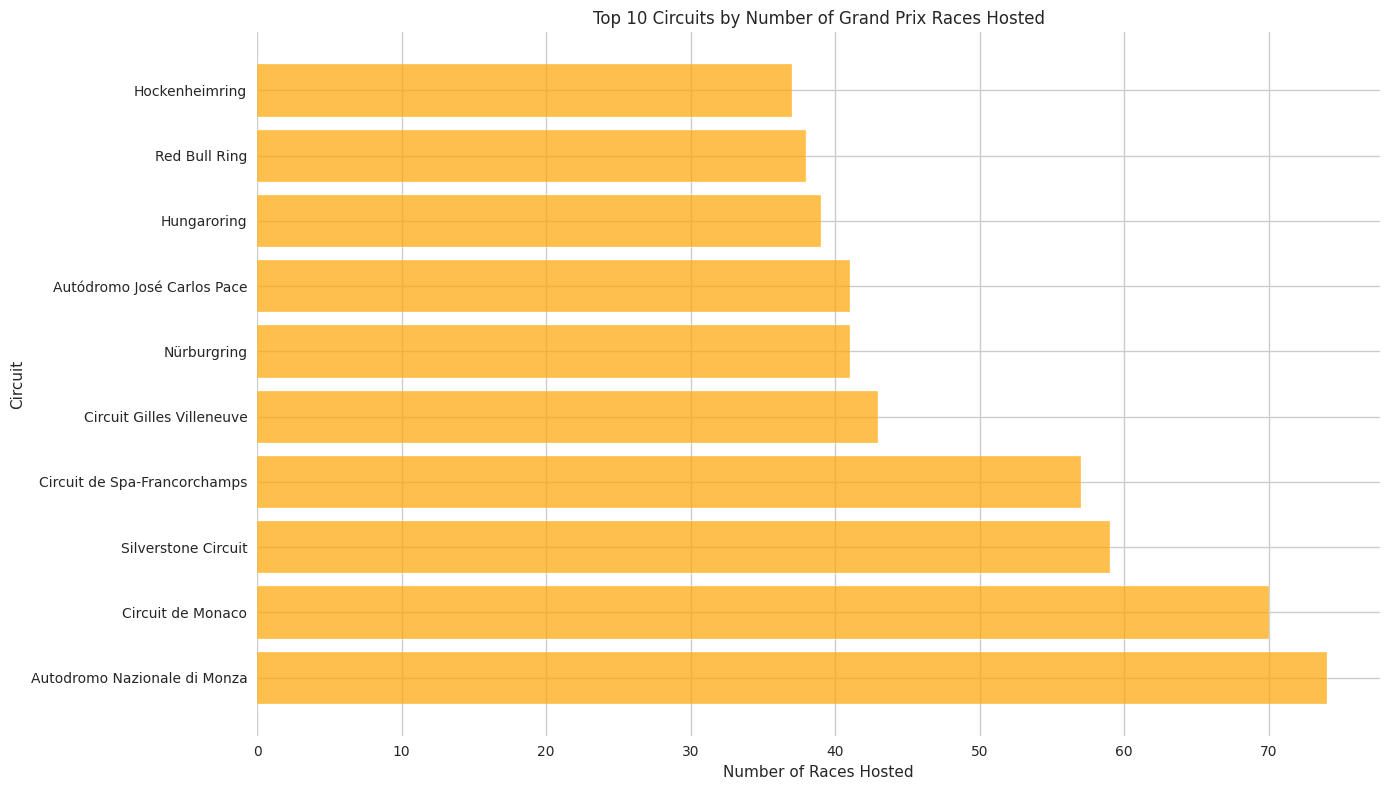

In [ ]:
races_by_circuit = races['circuitId'].value_counts().reset_index()
races_by_circuit.columns = ['circuitId', 'numberOfRaces']

races_by_circuit = races_by_circuit.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')
races_by_circuit_sorted = races_by_circuit.sort_values(by='numberOfRaces', ascending=False)

plt.figure(figsize=(14, 8))
plt.barh(races_by_circuit_sorted['name'].head(10), races_by_circuit_sorted['numberOfRaces'].head(10), color='orange', alpha=0.7)
plt.title('Top 10 Circuits by Number of Grand Prix Races Hosted')
plt.xlabel('Number of Races Hosted')
plt.ylabel('Circuit')
plt.tight_layout()
plt.show()

**all the countries that have hosted a Formula 1 World Championship Event**

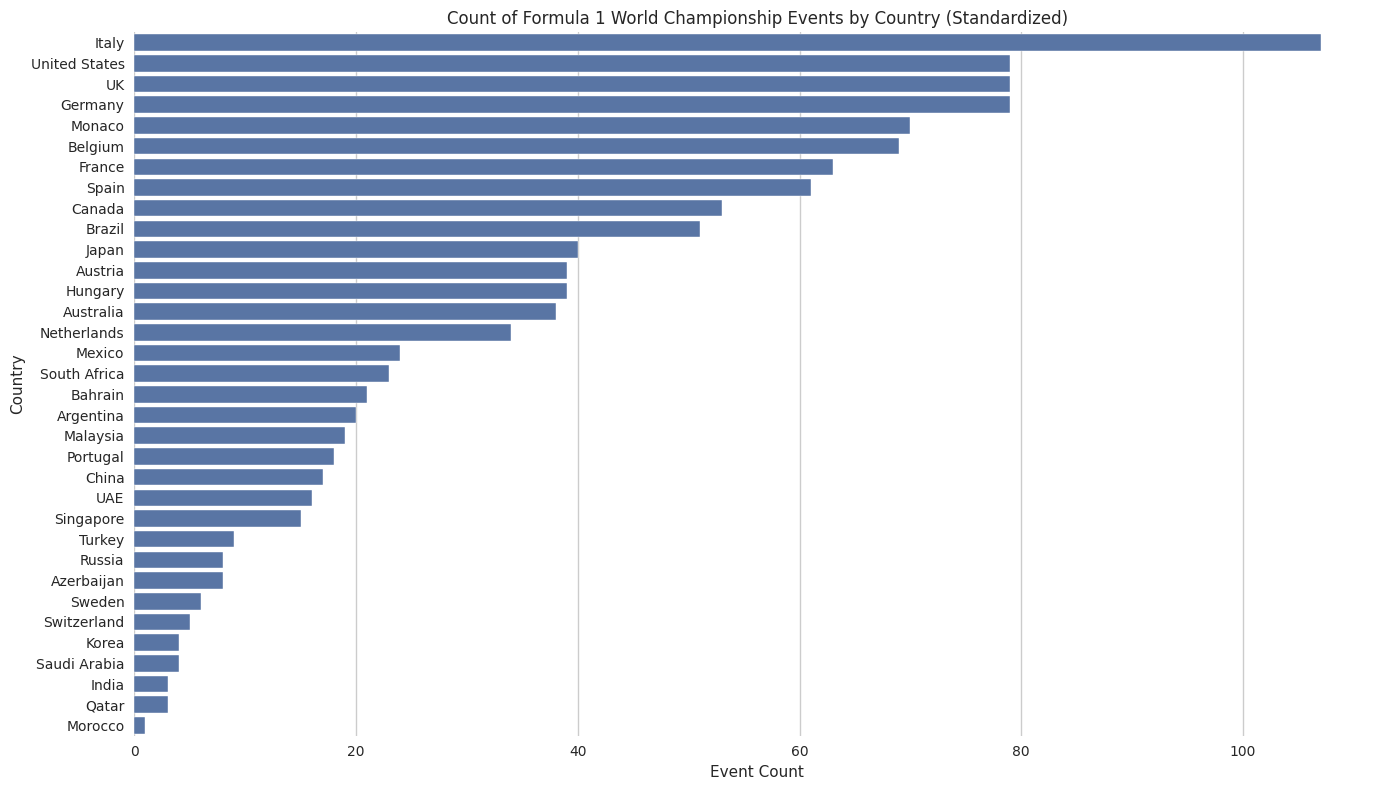

In [ ]:
races_with_countries = races.merge(circuits, on='circuitId', how='left')

races_with_countries['country'] = races_with_countries['country'].replace({'USA': 'United States', 'United States': 'United States'})

events_by_country_standardized = races_with_countries['country'].value_counts().reset_index()
events_by_country_standardized.columns = ['Country', 'Event Count']

plt.figure(figsize=(14, 8))
sns.countplot(data=races_with_countries, y='country', order=events_by_country_standardized['Country'])
plt.title('Count of Formula 1 World Championship Events by Country (Standardized)')
plt.xlabel('Event Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Max Verstappen VS Lewis Hamilton on 2021 season

**Race Positions by Circuit Verstappen vs Hamilton in 2021 Season**

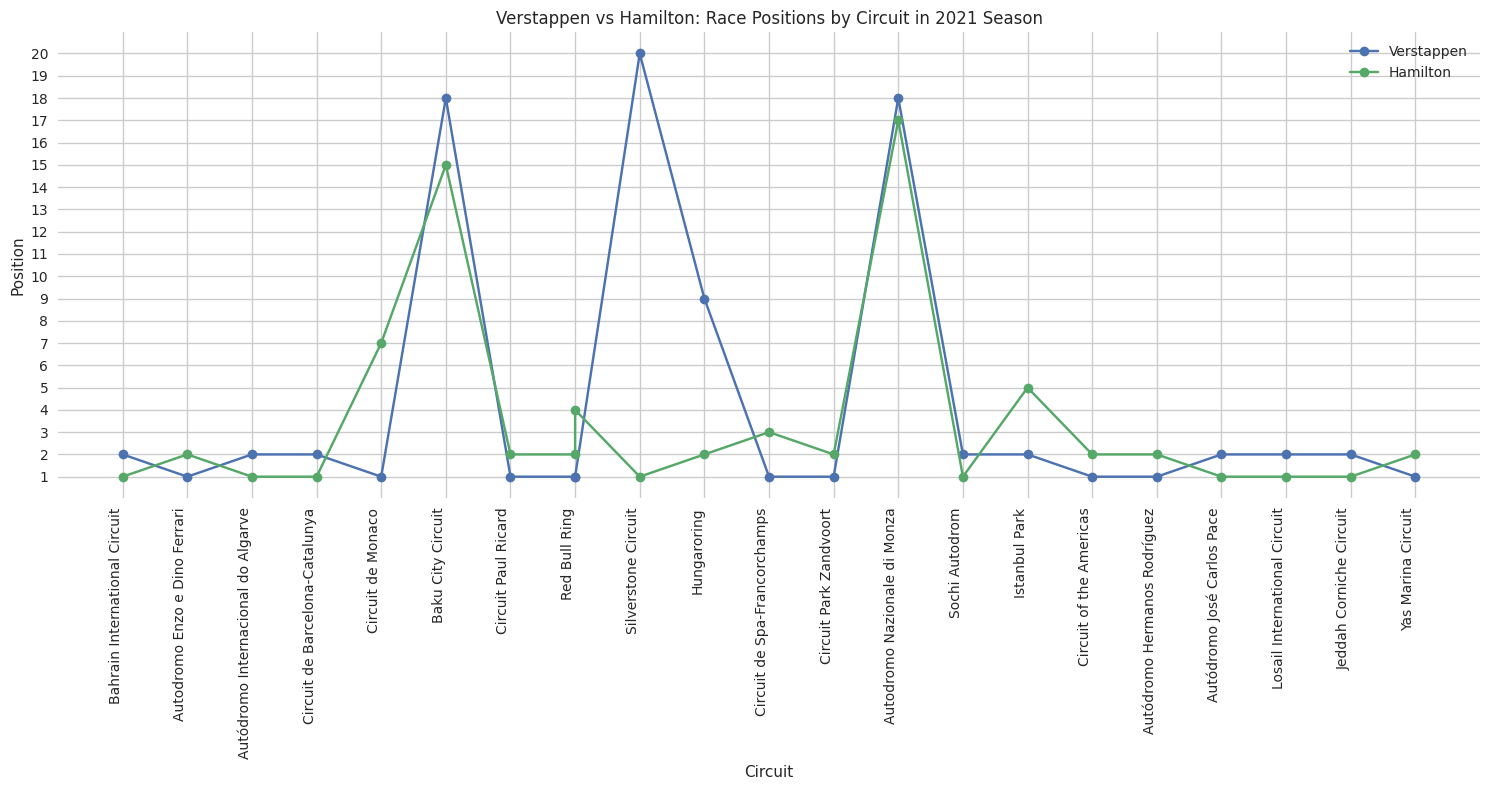

In [ ]:
races_2021 = races[races['year'] == 2021]
verstappen_id = drivers[drivers['driverRef'] == 'max_verstappen']['driverId'].iloc[0]
hamilton_id = drivers[drivers['driverRef'] == 'hamilton']['driverId'].iloc[0]

results_2021 = results[results['raceId'].isin(races_2021['raceId'])]
results_verstappen = results_2021[results_2021['driverId'] == verstappen_id]
results_hamilton = results_2021[results_2021['driverId'] == hamilton_id]

results_verstappen = pd.merge(results_verstappen, races_2021[['raceId', 'circuitId']], on='raceId')
results_hamilton = pd.merge(results_hamilton, races_2021[['raceId', 'circuitId']], on='raceId')
results_verstappen = pd.merge(results_verstappen, circuits[['circuitId', 'name']], on='circuitId')
results_hamilton = pd.merge(results_hamilton, circuits[['circuitId', 'name']], on='circuitId')

plt.figure(figsize=(15, 8))
plt.plot(results_verstappen['name'], results_verstappen['positionOrder'], marker='o', label='Verstappen')
plt.plot(results_hamilton['name'], results_hamilton['positionOrder'], marker='o', label='Hamilton')
plt.title("Verstappen vs Hamilton: Race Positions by Circuit in 2021 Season")
plt.xlabel("Circuit")
plt.ylabel("Position")
plt.xticks(rotation=90, ha='right')
plt.yticks(range(1, 21))
plt.legend()
plt.tight_layout()
plt.show()

**Qualifying Positions Verstappen vs Hamilton in 2021 Season**

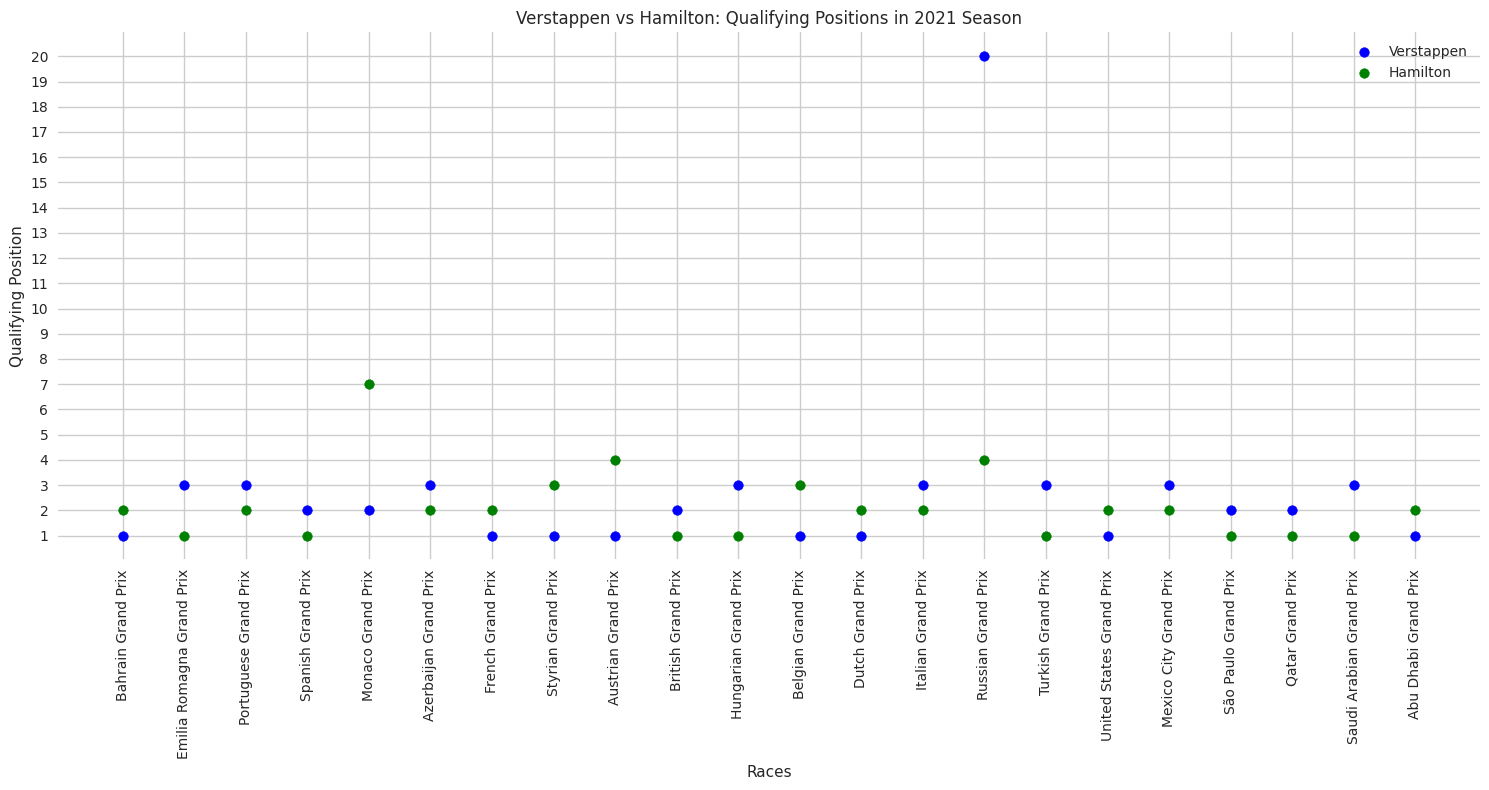

In [ ]:
races_2021 = races[races['year'] == 2021]
verstappen_id = drivers[drivers['driverRef'] == 'max_verstappen']['driverId'].iloc[0]
hamilton_id = drivers[drivers['driverRef'] == 'hamilton']['driverId'].iloc[0]

qualifying_2021 = qualifying[qualifying['raceId'].isin(races_2021['raceId'])]
qualifying_verstappen = qualifying_2021[qualifying_2021['driverId'] == verstappen_id]
qualifying_hamilton = qualifying_2021[qualifying_2021['driverId'] == hamilton_id]

qualifying_verstappen = pd.merge(qualifying_verstappen, races_2021[['raceId', 'name']], on='raceId')
qualifying_hamilton = pd.merge(qualifying_hamilton, races_2021[['raceId', 'name']], on='raceId')

plt.figure(figsize=(15, 8))
plt.scatter(qualifying_verstappen['name'], qualifying_verstappen['position'], label='Verstappen', color='blue')
plt.scatter(qualifying_hamilton['name'], qualifying_hamilton['position'], label='Hamilton', color='green')
plt.title("Verstappen vs Hamilton: Qualifying Positions in 2021 Season")
plt.xlabel("Races")
plt.ylabel("Qualifying Position")
plt.xticks(rotation=90)
plt.yticks(range(1, max(qualifying_verstappen['position'].max(), qualifying_hamilton['position'].max()) + 1))
plt.legend()
plt.tight_layout()
plt.show()

**Average Pit Stop Duration for Verstappen and Hamilton by Circuit in 2021 Season**

<ipython-input-32-7dd0e1802ed5>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


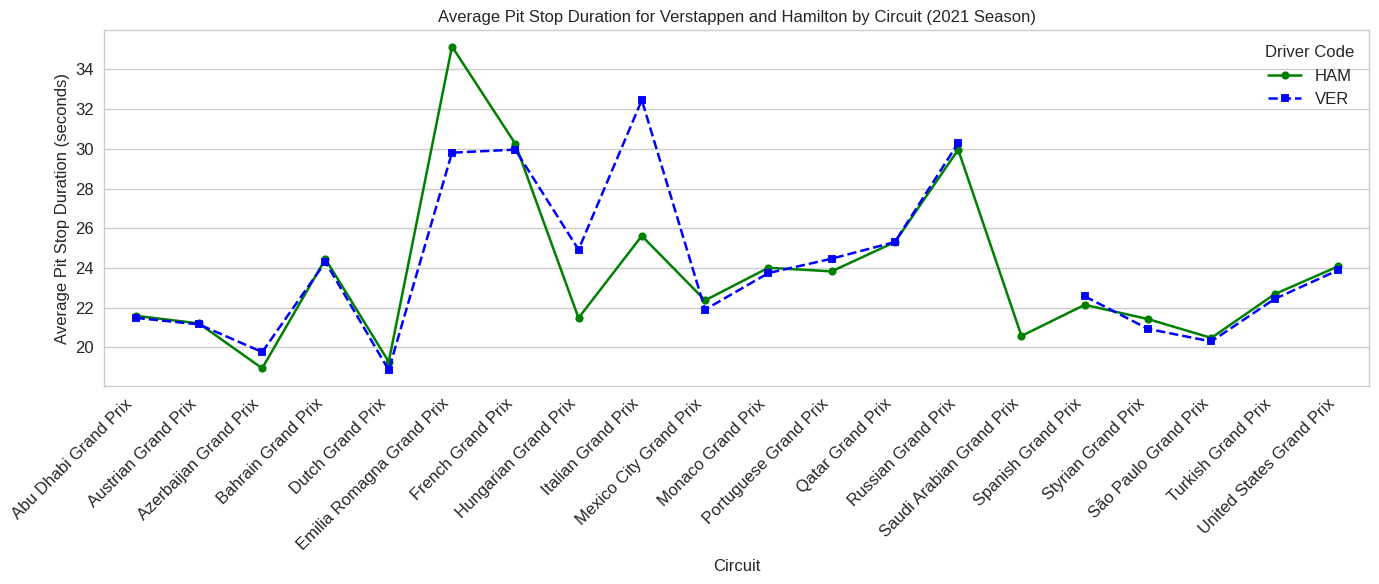

In [ ]:
df_pitstops = pit_stops.merge(drivers[['driverId','code','driverRef']],how='left',on='driverId')
df_pitstops = df_pitstops.merge(races[['raceId','name','date','year']],how='left',on='raceId', suffixes=('_pit', '_race'))
df_pitstops = df_pitstops[(df_pitstops['year']==2021)&((df_pitstops['code']=='VER')|(df_pitstops['code']=='HAM'))]
df_pitstops['duration']= df_pitstops['milliseconds']/1000

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 8, 12
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

plt.figure(figsize=(14, 6))
sns.pointplot(data=df_pitstops[df_pitstops['duration'] < 40].groupby(['name', 'code'])['duration'].mean().reset_index(),
              x='name',
              y='duration',
              hue='code',
              palette=['green', 'blue'],
              markers=['o', 's'],
              linestyles=['-', '--'])
plt.title('Average Pit Stop Duration for Verstappen and Hamilton by Circuit (2021 Season)')
plt.xlabel('Circuit')
plt.ylabel('Average Pit Stop Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Driver Code')
plt.tight_layout()
plt.show()

**Distribution of Pit Stop Durations for Verstappen and Hamilton in 2021 Season**

<ipython-input-33-05736a672bc5>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/

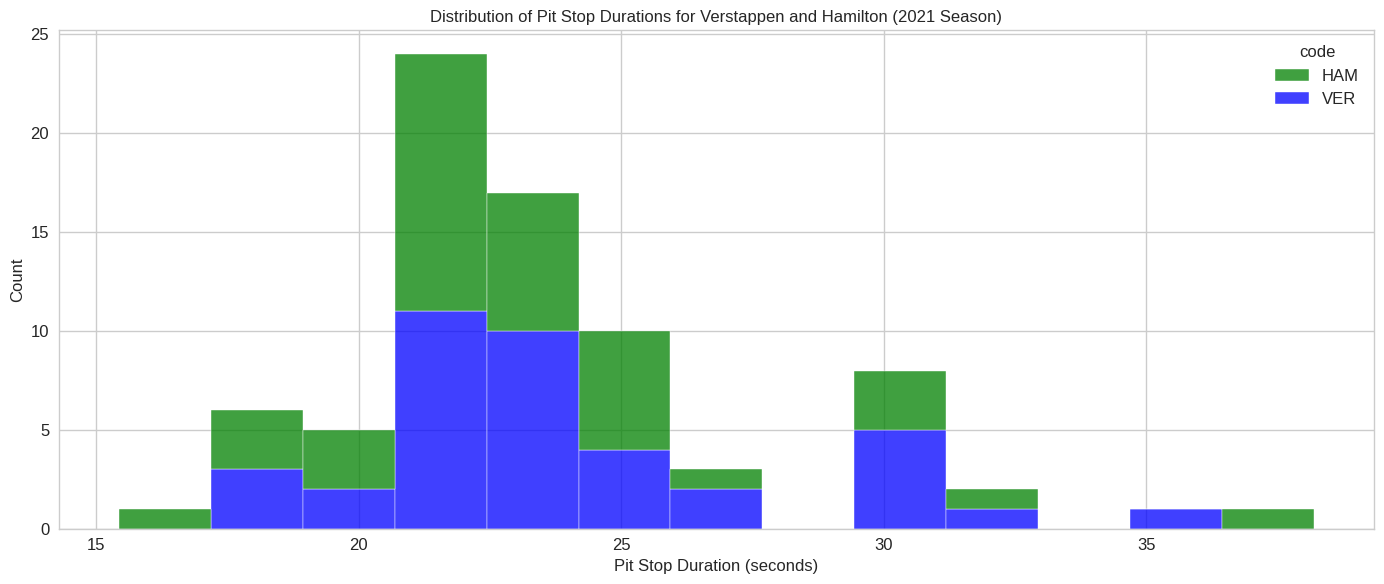

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 14, 6
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

plt.figure(figsize=(14, 6))
sns.histplot(df_pitstops[df_pitstops['duration'] < 40],
             x='duration',
             hue='code',
             multiple='stack',
             palette=['green', 'blue'])

plt.title('Distribution of Pit Stop Durations for Verstappen and Hamilton (2021 Season)')
plt.xlabel('Pit Stop Duration (seconds)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Hamilton vs Verstappen - Wins Comparison (over the years)**

<ipython-input-34-05f44108111c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Driver',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


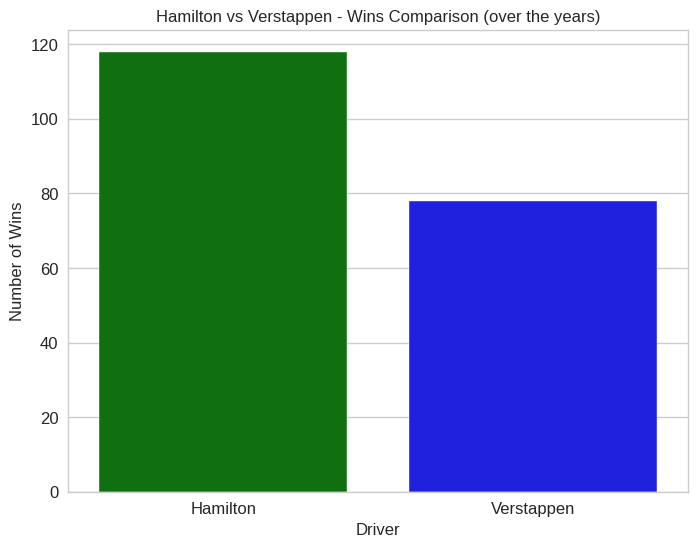

In [ ]:
results_merged_drivers = pd.merge(results, drivers, on="driverId", how="left")

hamilton_results = results_merged_drivers[results_merged_drivers['driverRef'] == 'hamilton']
verstappen_results = results_merged_drivers[results_merged_drivers['driverRef'] == 'max_verstappen']
head_to_head_hamilton_verstappen = pd.merge(hamilton_results, verstappen_results, on='raceId', suffixes=('_hamilton', '_verstappen'))

hamilton_wins = (head_to_head_hamilton_verstappen['positionOrder_hamilton'] < head_to_head_hamilton_verstappen['positionOrder_verstappen']).sum()
verstappen_wins = (head_to_head_hamilton_verstappen['positionOrder_hamilton'] > head_to_head_hamilton_verstappen['positionOrder_verstappen']).sum()

total_races = len(head_to_head_hamilton_verstappen)

hamilton_points = head_to_head_hamilton_verstappen['points_hamilton'].sum()
verstappen_points = head_to_head_hamilton_verstappen['points_verstappen'].sum()

wins_data = pd.DataFrame({
    'Driver': ['Hamilton', 'Verstappen'],
    'Wins': [hamilton_wins, verstappen_wins]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Driver',
            y='Wins',
            data=wins_data,
            palette={'green', 'blue'})

plt.title('Hamilton vs Verstappen - Wins Comparison (over the years)')
plt.ylabel('Number of Wins')
plt.show()

**Hamilton vs Verstappen - Points Comparison (over the years)**

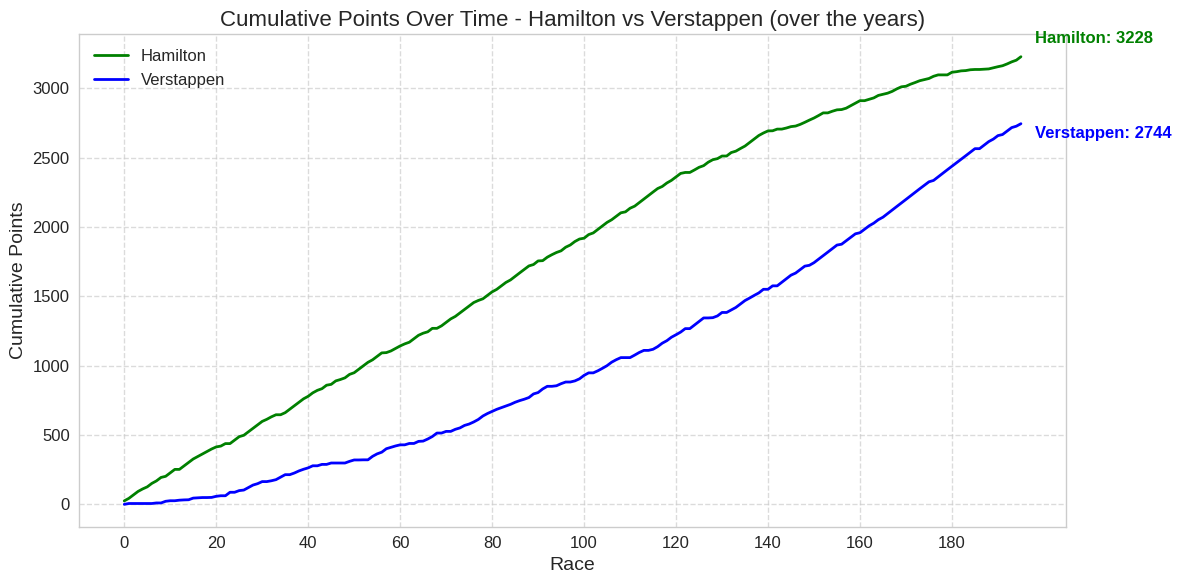

In [ ]:
head_to_head_hamilton_verstappen['cumulative_points_hamilton'] = head_to_head_hamilton_verstappen['points_hamilton'].cumsum()
head_to_head_hamilton_verstappen['cumulative_points_verstappen'] = head_to_head_hamilton_verstappen['points_verstappen'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=head_to_head_hamilton_verstappen,
             x=head_to_head_hamilton_verstappen.index,
             y='cumulative_points_hamilton',
             label='Hamilton',
             color='green',
             linewidth=2)

sns.lineplot(data=head_to_head_hamilton_verstappen,
             x=head_to_head_hamilton_verstappen.index,
             y='cumulative_points_verstappen',
             label='Verstappen',
             color='blue',
             linewidth=2)

plt.title('Cumulative Points Over Time - Hamilton vs Verstappen (over the years)', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Cumulative Points', fontsize=14)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(range(0, len(head_to_head_hamilton_verstappen), 20))
final_hamilton = head_to_head_hamilton_verstappen['cumulative_points_hamilton'].iloc[-1]
final_verstappen = head_to_head_hamilton_verstappen['cumulative_points_verstappen'].iloc[-1]

plt.annotate(f'Hamilton: {final_hamilton:.0f}',
             xy=(len(head_to_head_hamilton_verstappen)-1, final_hamilton),
             xytext=(10, 10),
             textcoords='offset points',
             color='green',
             fontweight='bold')

plt.annotate(f'Verstappen: {final_verstappen:.0f}',
             xy=(len(head_to_head_hamilton_verstappen)-1, final_verstappen),
             xytext=(10, -10),
             textcoords='offset points',
             color='blue',
             fontweight='bold')

plt.tight_layout()
plt.show()